# Importing Libraries & Reading the CSV File

In [1]:
# Import the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Adding a constant variable 
import statsmodels.api as sm 
# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [2]:
# Function to create linear regession model and fit it.
def GetLinearRegression(X_train, y_train):
    # Add a constant
    X_train_lm = sm.add_constant(X_train, has_constant=False)
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

### Step 1 - Read training data

In [3]:
# Read file
# Place loan.csv file in the same folder as that of this notebook

df_train = pd.read_csv("train.csv", low_memory=False)

### Step 2 - Initial Data Exploration

In [4]:
# Get Type of the columns

df_info = df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Step 2.1 - Univariate Analysis of the Target Variable

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

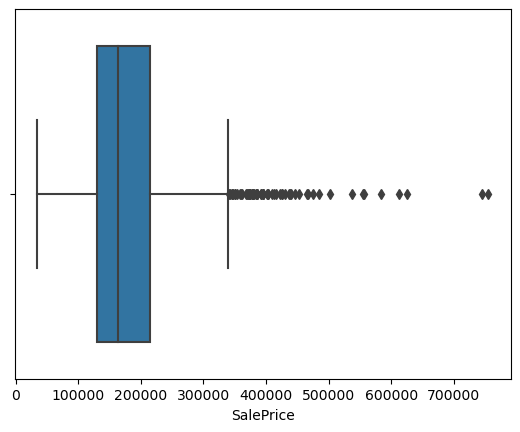

In [6]:
sns.boxplot(df_train['SalePrice'])

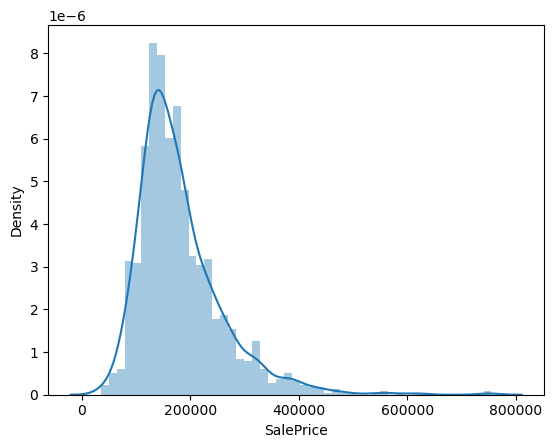

In [7]:
sns.distplot(df_train['SalePrice'])
plt.show()

In [8]:
### Inference 
#### SalePrice is skewed with certain outliers

#### Step 2.2 - Bivariate Analysis

#### Understand Correlation between variables

In [9]:
df_train.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

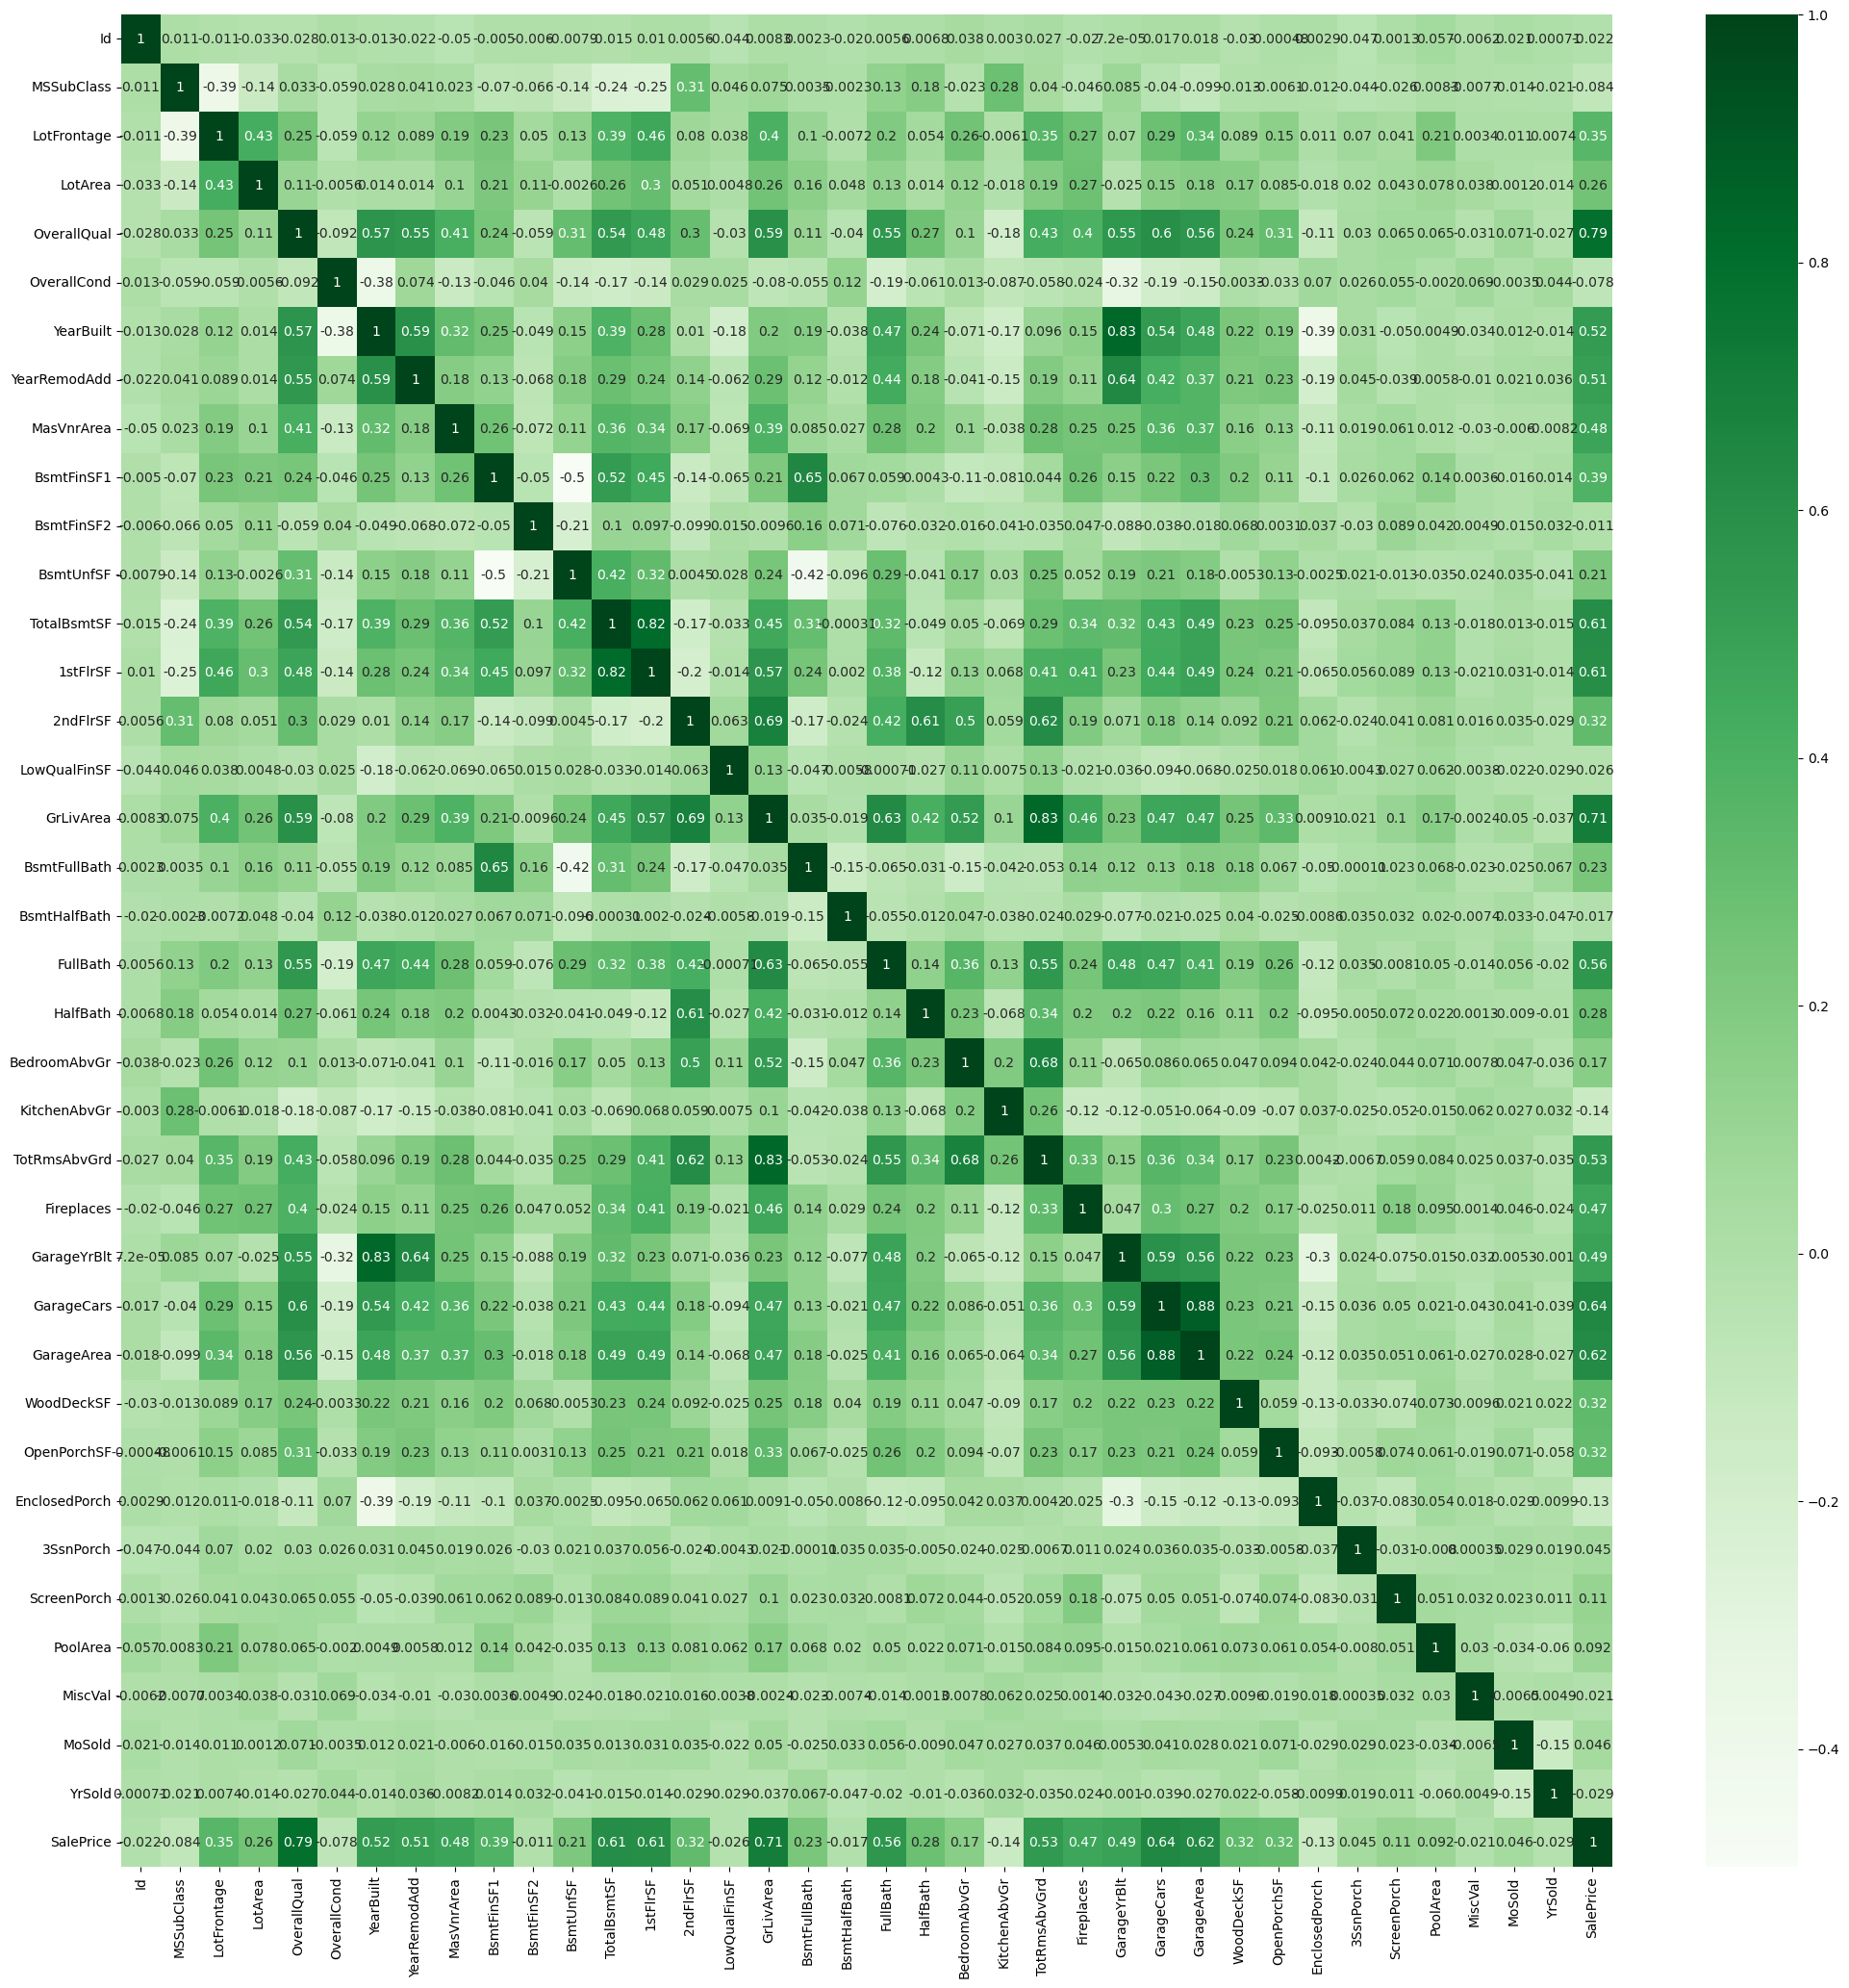

In [10]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(), cmap="Greens",annot=True, ax=ax)
plt.show()

In [11]:
### Inferemce
#### YerBuilt and GarageYrBuilt are highly correlated
#### SalePrice and OverallQual are highly correlated
#### 1stFloorSF and TotalBsmtSF are highly correlated
#### GrLivArea and SalePrice are highly correlated
#### GarageArea and GarageCars are highly correlated

### Step 3 Data Cleaning

#### Step 3.1 - Handling NULL Values in columns

In [12]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
## Drop Columns with more NULL values
lst_drop_col = ['PoolQC','Fence','MiscFeature','MiscVal','Alley','FireplaceQu','BsmtFinSF2']
df_train = df_train.drop(lst_drop_col,axis = 1)

#### Step 3.2 - Handling missing values in rows
#### For categorical variables, replace NaN values with "Na"
#### For numerical variables, use the mean value of the column as the replacement value for NaN

In [14]:
# Replace categorical variable NULL values with valid NA value for columns

df_train['MasVnrType'].fillna('NA',inplace=True)
df_train['BsmtQual'].fillna('NA',inplace=True)
df_train['BsmtCond'].fillna('NA',inplace=True)
df_train['BsmtExposure'].fillna('NA',inplace=True)
df_train['BsmtFinType1'].fillna('NA',inplace=True)
df_train['BsmtFinType2'].fillna('NA',inplace=True)
df_train['GarageType'].fillna('NA',inplace=True)
df_train['GarageFinish'].fillna('NA',inplace=True)
df_train['GarageQual'].fillna('NA',inplace=True)
df_train['GarageCond'].fillna('NA',inplace=True)


In [15]:
# Replace numerical variable NULL values with the mean value of the column
# For GarageYrBlt column, replace the NaN value with the value of the
# YearBuilt column with the assumption that Garage would have been built in the same year as that of the house

df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(),inplace=True)
df_train['GarageYrBlt'].fillna(df_train['YearBuilt'],inplace=True)


In [16]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

#### Step 3.3 - Handling high cardinality columns

In [17]:
counts = df_train.nunique()
counts

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

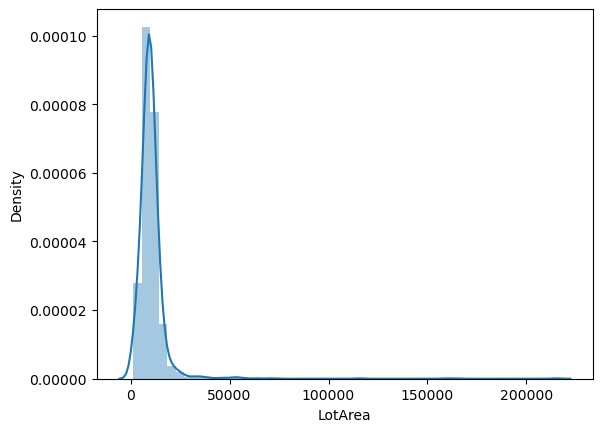

In [18]:
sns.distplot(df_train['LotArea'])
df_train['LotArea'].describe()


In [19]:
### Inference
#### LotArea is an important attribute. Instead of dropping the column, we can remove the outliers

In [20]:
#Remove high cardinality columns
lst_high_cardinality = ['Id']
df_train = df_train.drop(lst_high_cardinality,axis=1)

In [21]:
df_train.shape

(1460, 73)

#### Step 3.4 - Unordered Variable Mapping

In [22]:
# Defining the map function to map unordered numeric variables to respective string descriptions

def MapMSSubClass(x):
    return x.map({20:'1-STORY >= 1946', 30:'1-STORY < 1945', 40:'1-STORY W/FINISHED', 45:'1-1/2 STORY - UNFINISHED', 50:'1-1/2 STORY - FINISHED',
                 60:'2-STORY >= 1946',70:'2-STORY < 1945',75:'2-1/2 STORY',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX',
                 120:'1-STORY PUD',150:'1-1/2 STORY PUD',160:'2-STORY PUD',180:'PUD - MULTILEVEL',190:'2 FAMILY CONVERSION'})

df_train[['MSSubClass']] = df_train[['MSSubClass']].apply(MapMSSubClass)

#### Step 3.5 - Removing highly correlated columns

In [23]:
df_train.corr()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.306795     0.234196    -0.052820   0.117598   
LotArea           0.306795  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.234196  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.052820 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.117598  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.082746  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.179283  0.103960     0.410238    -0.127788   0.314745   
BsmtFinSF1        0.215828  0.214103     0.239666    -0.046231   0.249503   
BsmtUnfSF         0.122156 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.363358  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.414266  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.072483  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.036849  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.368392  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.091481  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.006419  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.180424  0.126031     0.550600    -0.194149   0.468271   
HalfBath          0.048258  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.237023  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     -0.005805 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.320146  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.235755  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.088746  0.003669     0.555022    -0.296887   0.845141   
GarageCars        0.269729  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.323663  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF        0.077106  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.137454  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.009790 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.062335  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.037684  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.180868  0.077672     0.065166    -0.001985   0.004950   
MoSold            0.010158  0.001205     0.070815    -0.003511   0.012398   
YrSold            0.006768 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.334901  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
LotFrontage        0.082746    0.179283    0.215828   0.122156     0.363358   
LotArea            0.013788    0.103960    0.214103  -0.002618     0.260833   
OverallQual        0.550684    0.410238    0.239666   0.308159     0.537808   
OverallCond        0.073741   -0.127788   -0.046231  -0.136841    -0.171098   
YearBuilt          0.592855    0.314745    0.249503   0.149040     0.391452   
YearRemodAdd       1.000000    0.179186    0.128451   0.181133     0.291066   
MasVnrArea         0.179186    1.000000    0.263582   0.114184     0.362452   
BsmtFinSF1         0.128451    0.263582    1.000000  -0.495251     0.522396   
BsmtUnfSF          0.181133    0.114184   -0.495251   1.000000     0.415360   
TotalBsmtSF        0.291066    0.362452    0.522396   0.415360     1.000000   
1stFlrSF           0.240379    0.342160    0.445863   0.317987     0.819530   
2ndFlrSF           0.140024    0.174019   -0.137079   0.004469    -0.174512   
LowQualFinSF      -0.062419   -0.069068   -0.064503   0.028167    -0.033245   
GrLivArea          0.287389    0.389893    0.208171   0.240257     0.454868   
BsmtFullBath       0.119470    0.085055    0.649212  -0.422900     0.307351   
BsmtHalfBath      -0.012337    0.026669    0.067418  -0

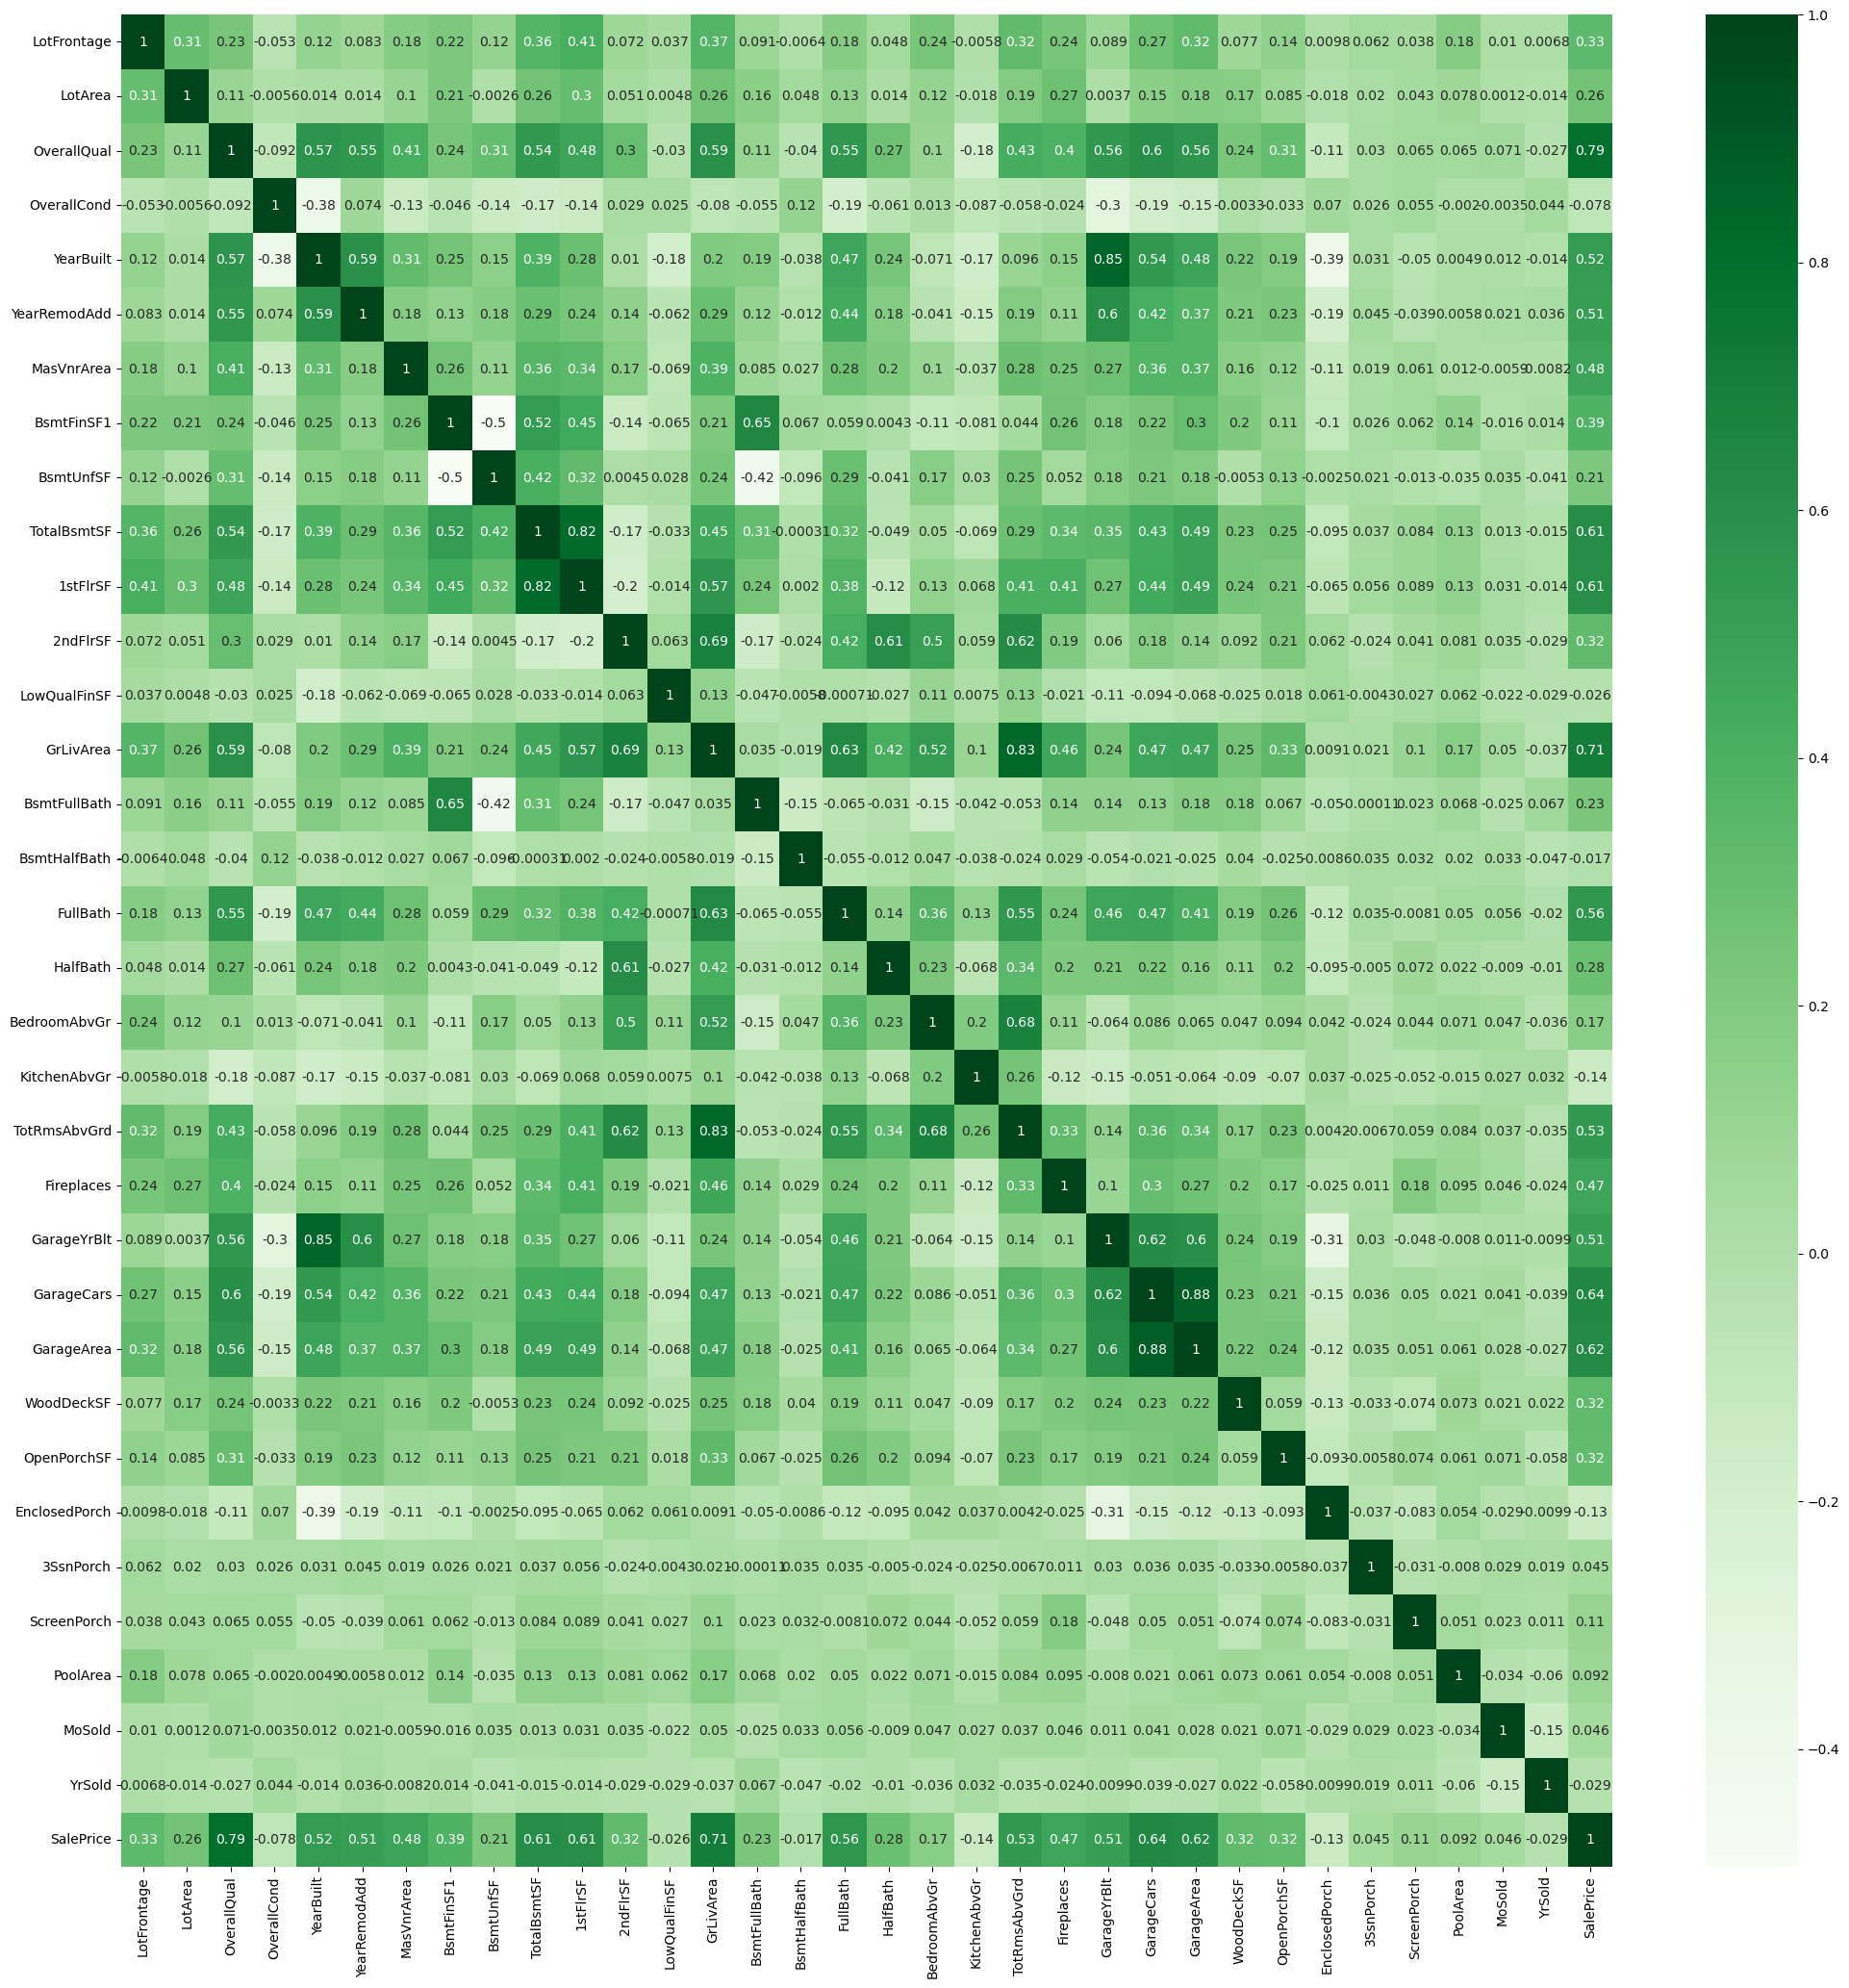

In [24]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(), cmap="Greens",annot=True, ax=ax)
plt.show()

In [25]:
### Inference
### From the Correlation Plot we can infer the following
#### - GrLivArea & TotRmsAbvGrd are highly correlated
#### - OverallQual & SalePrice are highly correlated (0.79)
#### - GarageCars & GarageArea are highly correlated (0.88)
#### - TotalBsmtSF & 1stFlrSF are highly correlated (0.82)

#### So, one of the columns from each pair can be removed
#### Columns to be removed - ['GrLivArea','OverallQual','GarageArea','1stFlrSF']

In [26]:
lst_corr_cols = ['GrLivArea','GarageArea','1stFlrSF']
df_train = df_train.drop(lst_corr_cols,axis = 1)

In [27]:
df_train.shape

(1460, 70)

#### Step 3.6 - Standardising Values

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [29]:
# Standardizing Datatypes
df_train.isnull().sum()
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].apply(lambda x : int(x))
df_train['YrSold'] = df_train['YrSold'].apply(lambda x : int(x))
df_train[['OverallQual','OverallCond']] = df_train[['OverallQual','OverallCond']].astype('object')


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Step 3.7 - Removing Outliers

In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_train.describe()

LotFrontage      LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
count   1460.00000   1460.00000 1460.00000    1460.00000  1460.00000   
mean      70.04996  10516.82808 1971.26781    1984.86575   103.68526   
std       22.02402   9981.26493   30.20290      20.64541   180.56911   
min       21.00000   1300.00000 1872.00000    1950.00000     0.00000   
25%       60.00000   7553.50000 1954.00000    1967.00000     0.00000   
50%       70.04996   9478.50000 1973.00000    1994.00000     0.00000   
75%       79.00000  11601.50000 2000.00000    2004.00000   164.25000   
max      313.00000 215245.00000 2010.00000    2010.00000  1600.00000   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF   2ndFlrSF  LowQualFinSF  \
count  1460.00000 1460.00000   1460.00000 1460.00000    1460.00000   
mean    443.63973  567.24041   1057.42945  346.99247       5.84452   
std     456.09809  441.86696    438.70532  436.52844      48.62308   
min       0.00000    0.00000      0.00000    0.00000       0.00000   
25%       0.00000  223.00000    795.75000    0.00000       0.00000   
50%     383.50000  477.50000    991.50000    0.00000       0.00000   
75%     712.25000  808.00000   1298.25000  728.00000       0.00000   
max    5644.00000 2336.00000   6110.00000 2065.00000     572.00000   

       BsmtFullBath  BsmtHalfBath   FullBath   HalfBath  BedroomAbvGr  \
count    1460.00000    1460.00000 1460.00000 1460.00000    1460.00000   
mean        0.42534       0.05753    1.56507    0.38288       2.86644   
std         0.51891       0.23875    0.55092    0.50289       0.81578   
min         0.00000       0.00000    0.00000    0.00000       0.00000   
25%         0.00000       0.00000    1.00000    0.00000       2.00000   
50%         0.00000       0.00000    2.00000    0.00000       3.00000   
75%         1.00000       0.00000    2.00000    1.00000       3.00000   
max         3.00000       2.00000    3.00000    2.00000       8.00000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    1460.00000    1460.00000  1460.00000   1460.00000  1460.00000   
mean        1.04658       6.51781     0.61301   1976.50753     1.76712   
std         0.22034       1.62539     0.64467     26.30674     0.74732   
min         0.00000       2.00000     0.00000   1872.00000     0.00000   
25%         1.00000       5.00000     0.00000   1959.00000     1.00000   
50%         1.00000       6.00000     1.00000   1978.00000     2.00000   
75%         1.00000       7.00000     1.00000   2001.00000     2.00000   
max         3.00000      14.00000     3.00000   2010.00000     4.00000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.00000   1460.00000     1460.00000 1460.00000   1460.00000   
mean     94.24452     46.66027       21.95411    3.40959     15.06096   
std     125.33879     66.25603       61.11915   29.31733     55.75742   
min       0.00000      0.00000        0.00000    0.00000      0.00000   
25%       0.00000      0.00000        0.00000    0.00000      0.00000   
50%       0.00000     25.00000        0.00000    0.00000      0.00000   
75%     168.00000     68.00000        0.00000    0.00000      0.00000   
max     857.00000    547.00000      552.00000  508.00000    480.00000   

        PoolArea     MoSold     YrSold    SalePrice  
count 1460.00000 1460.00000 1460.00000   1460.00000  
mean     2.75890    6.32192 2007.81575 180921.19589  
std     40.17731    2.70363    1.32810  79442.50288  
min      0.00000    1.00000 2006.00000  34900.00000  
25%      0.00000    5.00000 2007.00000 129975.00000  
50%      0.00000    6.00000 2008.00000 163000.00000  
75%      0.00000    8.00000 2009.00000 214000.00000  
max    738.00000   12.00000 2010.00000 755000.00000

<AxesSubplot:>

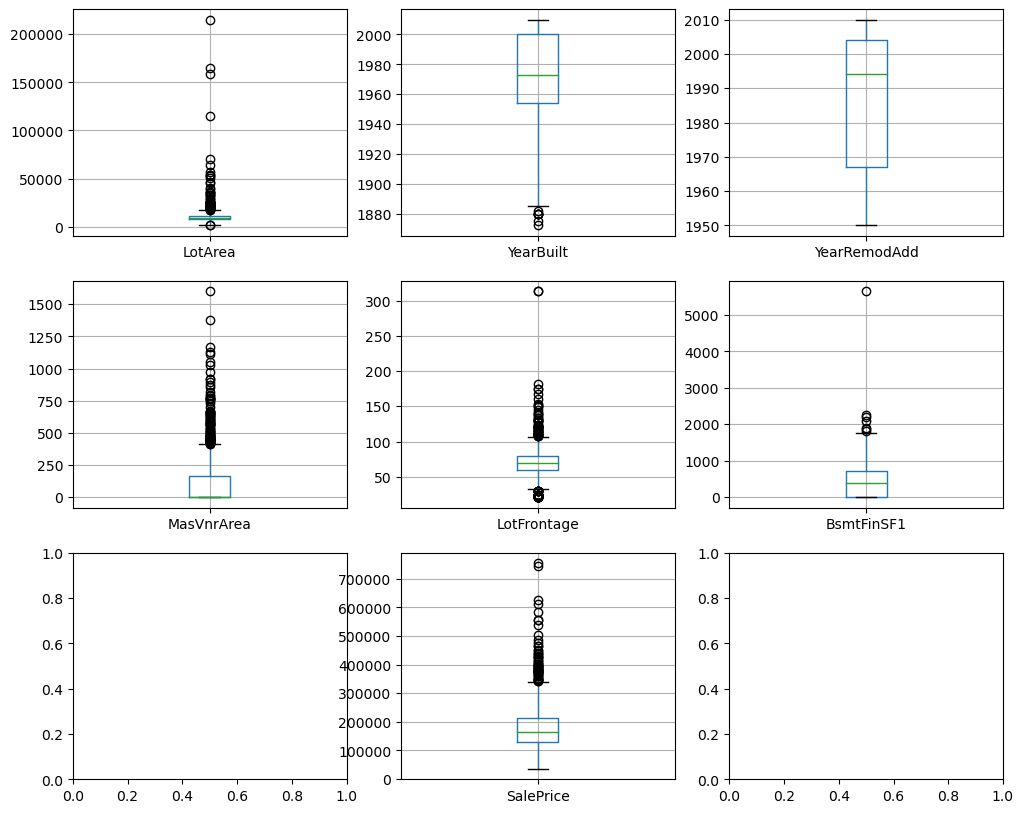

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

df_train.boxplot(column='LotArea', ax=axes[0,0])
df_train.boxplot(column='YearBuilt', ax=axes[0,1])
df_train.boxplot(column='YearRemodAdd', ax=axes[0,2])
df_train.boxplot(column='MasVnrArea', ax=axes[1,0])
df_train.boxplot(column='LotFrontage', ax=axes[1,1])
df_train.boxplot(column='BsmtFinSF1', ax=axes[1,2])
df_train.boxplot(column='SalePrice', ax=axes[2,1])

#MasVnrArea
#BsmtFinSF1
#SalePrice


In [32]:
### Removing outliers in LotArea column
percentile_90_LotArea = df_train['LotArea'].quantile(0.99)
df_train = df_train[df_train['LotArea'] < percentile_90_LotArea]
df_train.describe()

LotFrontage     LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
count   1445.00000  1445.00000 1445.00000    1445.00000  1445.00000   
mean      69.81498  9776.58893 1971.25813    1984.80415   102.33113   
std       21.01393  4238.85625   30.24414      20.66300   178.35182   
min       21.00000  1300.00000 1872.00000    1950.00000     0.00000   
25%       60.00000  7500.00000 1954.00000    1967.00000     0.00000   
50%       70.04996  9430.00000 1973.00000    1994.00000     0.00000   
75%       79.00000 11475.00000 2000.00000    2004.00000   163.00000   
max      313.00000 36500.00000 2010.00000    2010.00000  1600.00000   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF   2ndFlrSF  LowQualFinSF  \
count  1445.00000 1445.00000   1445.00000 1445.00000    1445.00000   
mean    434.24706  569.08997   1048.60900  345.31349       5.90519   
std     429.52074  442.56378    413.47572  434.60793      48.87130   
min       0.00000    0.00000      0.00000    0.00000       0.00000   
25%       0.00000  224.00000    794.00000    0.00000       0.00000   
50%     379.00000  481.00000    990.00000    0.00000       0.00000   
75%     704.00000  808.00000   1281.00000  728.00000       0.00000   
max    2188.00000 2336.00000   3206.00000 2065.00000     572.00000   

       BsmtFullBath  BsmtHalfBath   FullBath   HalfBath  BedroomAbvGr  \
count    1445.00000    1445.00000 1445.00000 1445.00000    1445.00000   
mean        0.41799       0.05744    1.56194    0.38270       2.86644   
std         0.51267       0.23864    0.54678    0.50302       0.81163   
min         0.00000       0.00000    0.00000    0.00000       0.00000   
25%         0.00000       0.00000    1.00000    0.00000       2.00000   
50%         0.00000       0.00000    2.00000    0.00000       3.00000   
75%         1.00000       0.00000    2.00000    1.00000       3.00000   
max         3.00000       2.00000    3.00000    2.00000       8.00000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    1445.00000    1445.00000  1445.00000   1445.00000  1445.00000   
mean        1.04706       6.50450     0.60138   1976.53979     1.76194   
std         0.22143       1.60962     0.63508     26.31638     0.74808   
min         0.00000       2.00000     0.00000   1872.00000     0.00000   
25%         1.00000       5.00000     0.00000   1959.00000     1.00000   
50%         1.00000       6.00000     1.00000   1978.00000     2.00000   
75%         1.00000       7.00000     1.00000   2001.00000     2.00000   
max         3.00000      14.00000     3.00000   2010.00000     4.00000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1445.00000   1445.00000     1445.00000 1445.00000   1445.00000   
mean     92.06990     46.11349       22.14740    3.44498     14.95087   
std     121.51688     65.31331       61.39299   29.46714     55.63360   
min       0.00000      0.00000        0.00000    0.00000      0.00000   
25%       0.00000      0.00000        0.00000    0.00000      0.00000   
50%       0.00000     24.00000        0.00000    0.00000      0.00000   
75%     168.00000     68.00000        0.00000    0.00000      0.00000   
max     736.00000    547.00000      552.00000  508.00000    480.00000   

        PoolArea     MoSold     YrSold    SalePrice  
count 1445.00000 1445.00000 1445.00000   1445.00000  
mean     2.45536    6.31765 2007.81522 179844.11488  
std     38.38086    2.70185    1.32932  78495.84593  
min      0.00000    1.00000 2006.00000  34900.00000  
25%      0.00000    5.00000 2007.00000 129900.00000  
50%      0.00000    6.00000 2008.00000 162000.00000  
75%      0.00000    8.00000 2009.00000 213000.00000  
max    738.00000   12.00000 2010.00000 755000.00000

In [33]:
df_train.shape

(1445, 70)

In [34]:
### Removing outliers from important continuous variables - LotArea, SalesPrice, MasVnrArea, BsmtFinSF1, LotFrontage

### Removing outliers in LotArea column
percentile_90_LotArea = df_train['LotArea'].quantile(0.99)
df_train = df_train[df_train['LotArea'] < percentile_90_LotArea]

### Removing outliers in BsmtFinSF1 column
percentile_90_BsmtFinSF1 = df_train['BsmtFinSF1'].quantile(0.99)
df_train = df_train[df_train['BsmtFinSF1'] < percentile_90_BsmtFinSF1]

### Removing outliers in BsmtFinSF1 column
percentile_99_SalePrice = df_train['SalePrice'].quantile(0.99)
df_train = df_train[df_train['SalePrice'] < percentile_99_SalePrice]

### Removing outliers in MasVnrArea column
percentile_99_MasVnrArea = df_train['MasVnrArea'].quantile(0.99)
df_train = df_train[df_train['MasVnrArea'] < percentile_99_MasVnrArea]

### Removing outliers in MasVnrArea column
percentile_99_LotFrontage = df_train['LotFrontage'].quantile(0.99)
df_train = df_train[df_train['LotFrontage'] < percentile_99_LotFrontage]

df_train.describe()


LotFrontage     LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
count   1372.00000  1372.00000 1372.00000    1372.00000  1372.00000   
mean      68.25663  9399.30466 1970.49636    1984.34840    85.99498   
std       17.73960  3551.83363   30.24226      20.71496   138.19317   
min       21.00000  1300.00000 1872.00000    1950.00000     0.00000   
25%       60.00000  7418.75000 1953.00000    1966.00000     0.00000   
50%       70.04996  9245.50000 1972.00000    1993.00000     0.00000   
75%       78.00000 11236.50000 2000.00000    2003.00000   145.25000   
max      129.00000 25095.00000 2010.00000    2010.00000   660.00000   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF   2ndFlrSF  LowQualFinSF  \
count  1372.00000 1372.00000   1372.00000 1372.00000    1372.00000   
mean    410.19315  566.58382   1022.41910  335.78280       5.16764   
std     401.11072  436.33865    386.77474  422.20978      44.80542   
min       0.00000    0.00000      0.00000    0.00000       0.00000   
25%       0.00000  223.00000    788.00000    0.00000       0.00000   
50%     364.50000  484.00000    970.50000    0.00000       0.00000   
75%     686.00000  808.00000   1249.50000  720.00000       0.00000   
max    1518.00000 2121.00000   3206.00000 1818.00000     528.00000   

       BsmtFullBath  BsmtHalfBath   FullBath   HalfBath  BedroomAbvGr  \
count    1372.00000    1372.00000 1372.00000 1372.00000    1372.00000   
mean        0.40452       0.05685    1.54155    0.37172       2.86224   
std         0.50706       0.23786    0.53651    0.50122       0.80975   
min         0.00000       0.00000    0.00000    0.00000       0.00000   
25%         0.00000       0.00000    1.00000    0.00000       2.00000   
50%         0.00000       0.00000    2.00000    0.00000       3.00000   
75%         1.00000       0.00000    2.00000    1.00000       3.00000   
max         3.00000       2.00000    3.00000    2.00000       8.00000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    1372.00000    1372.00000  1372.00000   1372.00000  1372.00000   
mean        1.04810       6.43003     0.57434   1975.89213     1.72595   
std         0.22405       1.55387     0.62376     26.34975     0.73317   
min         0.00000       2.00000     0.00000   1872.00000     0.00000   
25%         1.00000       5.00000     0.00000   1959.00000     1.00000   
50%         1.00000       6.00000     1.00000   1977.00000     2.00000   
75%         1.00000       7.00000     1.00000   2000.25000     2.00000   
max         3.00000      14.00000     3.00000   2010.00000     4.00000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1372.00000   1372.00000     1372.00000 1372.00000   1372.00000   
mean     89.22595     44.77332       22.18659    3.50583     14.20481   
std     119.77485     64.36201       60.16838   29.90265     54.05940   
min       0.00000      0.00000        0.00000    0.00000      0.00000   
25%       0.00000      0.00000        0.00000    0.00000      0.00000   
50%       0.00000     24.00000        0.00000    0.00000      0.00000   
75%     164.25000     65.00000        0.00000    0.00000      0.00000   
max     736.00000    547.00000      386.00000  508.00000    480.00000   

        PoolArea     MoSold     YrSold    SalePrice  
count 1372.00000 1372.00000 1372.00000   1372.00000  
mean     1.80831    6.34840 2007.82143 172284.21137  
std     33.74507    2.69498    1.32728  64326.90506  
min      0.00000    1.00000 2006.00000  34900.00000  
25%      0.00000    5.00000 2007.00000 128500.00000  
50%      0.00000    6.00000 2008.00000 158950.00000  
75%      0.00000    8.00000 2009.00000 205000.00000  
max    738.00000   12.00000 2010.00000 415298.00000

<AxesSubplot:>

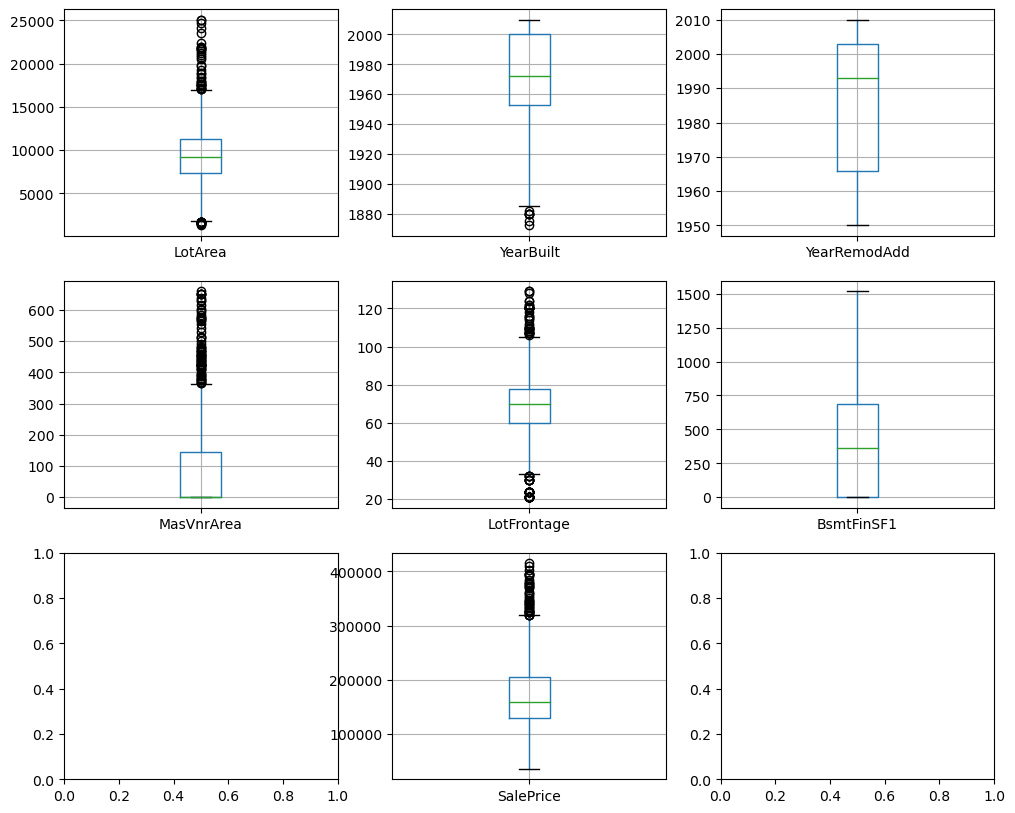

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

df_train.boxplot(column='LotArea', ax=axes[0,0])
df_train.boxplot(column='YearBuilt', ax=axes[0,1])
df_train.boxplot(column='YearRemodAdd', ax=axes[0,2])
df_train.boxplot(column='MasVnrArea', ax=axes[1,0])
df_train.boxplot(column='LotFrontage', ax=axes[1,1])
df_train.boxplot(column='BsmtFinSF1', ax=axes[1,2])
df_train.boxplot(column='SalePrice', ax=axes[2,1])



### Step 4 - Exploratory Data Analysis

#### Step 4.1 - Split columns into Categorical and Numerical
#### Columns such as OverallCond, YearBuilt etc are ordered numeric variables

In [36]:
### Get the list of continuous and categorical variables
categorical_col = list(df_train.select_dtypes(include=['object']).columns)
numerical_col =list(df_train.select_dtypes(exclude=['object']).columns)

print(categorical_col)
print(len(categorical_col))
print(numerical_col)
print(len(numerical_col))


['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
41
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']
29


#### Step 4.2 - Analyse Numerical variables

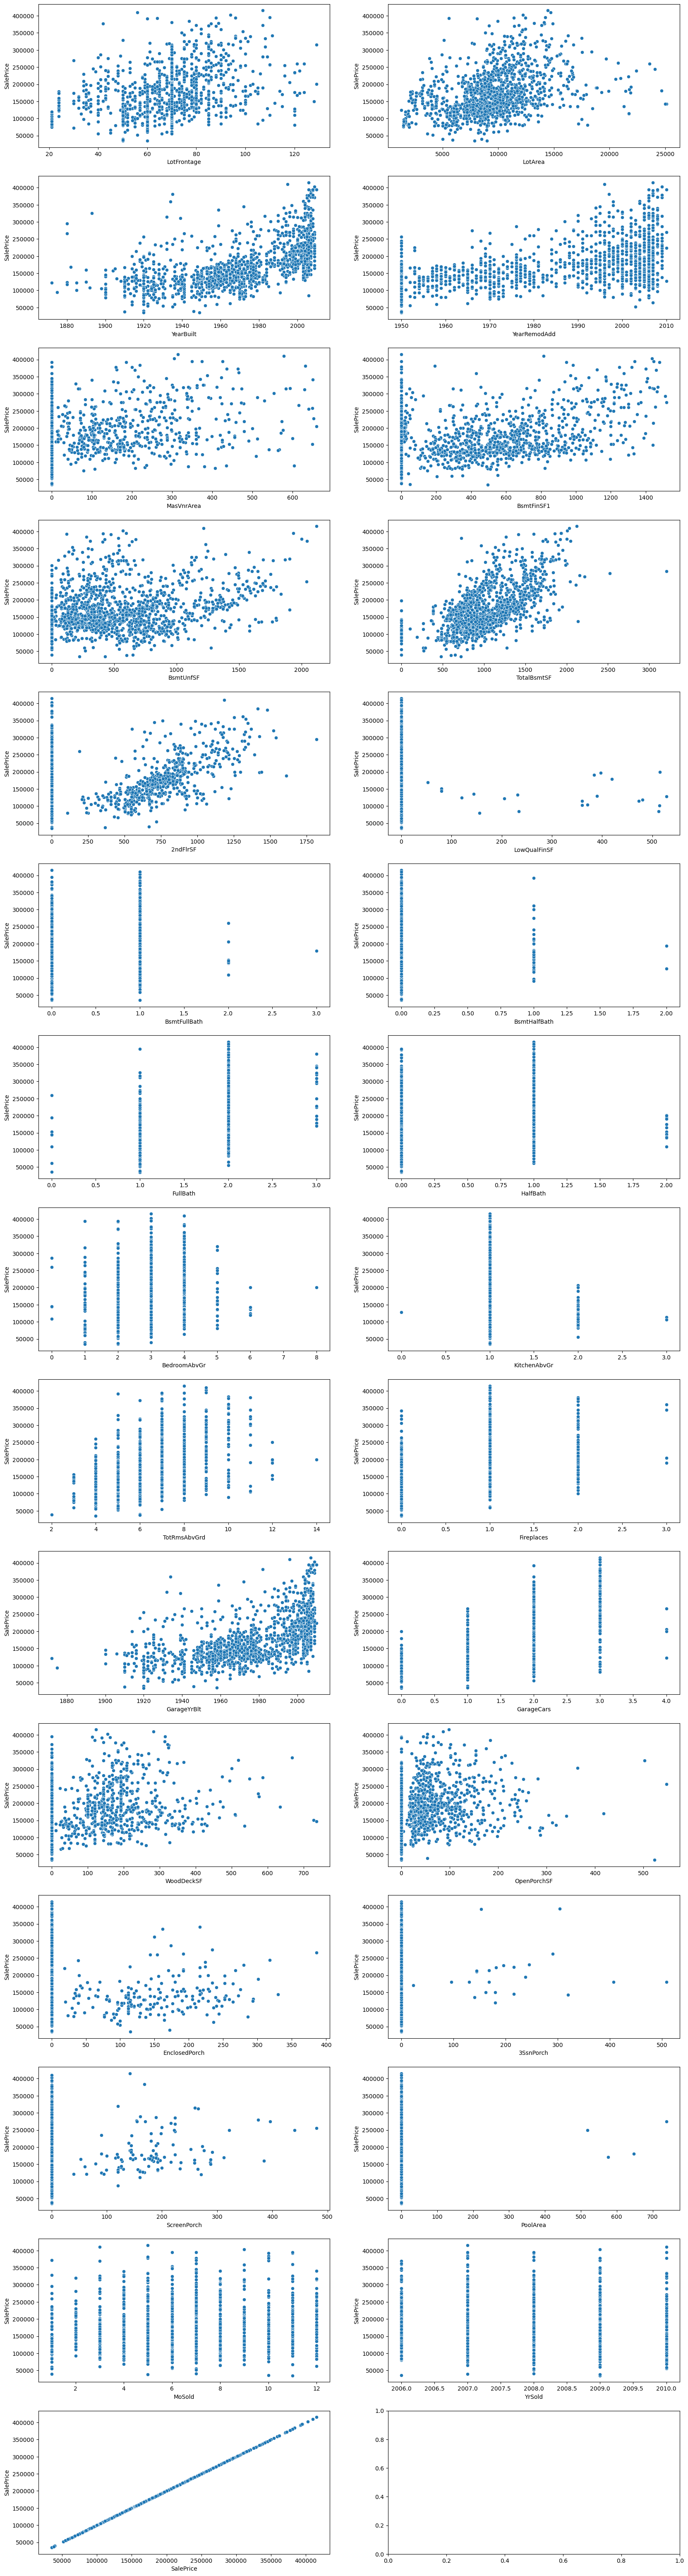

In [37]:
## Using seaborn pairplot to understand the distribution of numeric variable data

fig, axarr = plt.subplots(15, 2, figsize=(20,80))
                          
for i,col in enumerate(numerical_col):
    sns.scatterplot(y='SalePrice',x=col,ax=axarr[int(i/2)][int(i%2)],data=df_train)

In [38]:
#### Inference

#### The following columns have some sort of linear progression with respect to SalePrice
#### - YearBuilt
#### - BsmtFinSF1
#### - BsmtUnitSF
#### - TotalBsmtSF
#### - 2ndFinSF
#### - WoodDeckSF

#### Step 4.3 - Analyse Categorical Variables

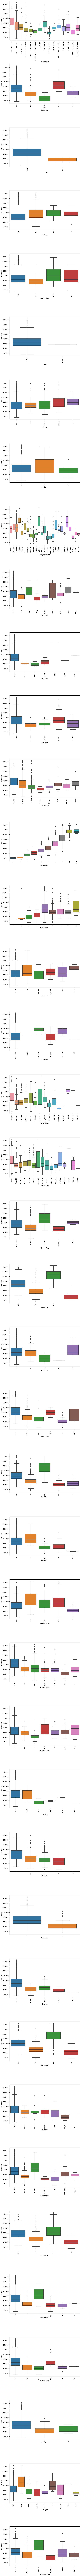

In [39]:
## Using seaborn pairplot to understand the distribution of numeric variable data

fig, axarr = plt.subplots(41, 1, figsize=(8, 250))              
for i, col in enumerate(categorical_col, start=0):
    ax = axarr[i]  # Access the appropriate subplot from axarr
    sns.boxplot(x=col, y='SalePrice', data=df_train, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Show the figure with all the boxplots
    

In [40]:

#### Inference
#### MSSubClass - 2 story 1946 & newer, 1 story PUD, split or multi-level are sold at higher price
#### MSZoning - Floating Village Residential units are sold at higher prices, commercial properties are sold at lower rates
#### LotShape - Moderately irregular plots are generally sold at higher prices compared to the others but some Regular plots are sold at higher prices though mean is less
#### LandContour - Except for Bnk, other means are similar, but certain Flat/Level properties are sold significantly higher than others
#### LotConfig - CulDSac properties have a higher mean but there are outliers with high sale price for Inside plots.
#### Neighborhood - NoRidge, NridgHt, Timber, ClearCr are priced higher than the other neighborhoods
#### HouseStyle - 2 story and 2.5 story finished houses are sold at higher price over others
#### RoofStyle - Shed houses have significantly high mean value
#### RoofMatl - Wood appears to be sold at higher prices
#### Exterior1st - Brick Common exterior has significantly lesser sale price compared to others
#### ExteriorQual - As expected, Houses with excellent quality of exteriors are sold at higher prices
#### GarageType - Houses with built in Garage is sold at higher prices compared to others
#### SaleType - New houses are sold at higher prices
#### OverallQual - Houses with higher rating for OverallQual are sold at higher prices
#### OverallCond - Houses with average rating for OverallCond are sold at higher prices


#### Step 5 Data Preparation for Regression

#### Step 5.1 - Split X and y for training data

In [41]:

# split into X and y

y = df_train.pop('SalePrice')
X = df_train

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [42]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  2-STORY >= 1946       RL     65.00000     8450   Pave      Reg         Lvl   
1  1-STORY >= 1946       RL     80.00000     9600   Pave      Reg         Lvl   
2  2-STORY >= 1946       RL     68.00000    11250   Pave      IR1         Lvl   
3   2-STORY < 1945       RL     60.00000     9550   Pave      IR1         Lvl   
4  2-STORY >= 1946       RL     84.00000    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story           7           5       2003          2003     Gable   
1     1Story           6           8       1976          1976     Gable   
2     2Story           7           5       2001          2002     Gable   
3     2Story           7           5       1915          1970     Gable   
4     2Story           8           5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   196.00000        Gd        TA   
1  CompShg     MetalSd     MetalSd       None     0.00000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   162.00000        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None     0.00000        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   350.00000        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf        150          856    GasA        Ex          Y   
1          Unf        284         1262    GasA        Ex          Y   
2          Unf        434          920    GasA        Ex          Y   
3          Unf        540          756    GasA        Gd          Y   
4          Unf        490         1145    GasA        Ex          Y   

  Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       854             0             1             0         2   
1      SBrkr         0             0             0             1         2   
2      SBrkr       866             0             1             0         2   
3      SBrkr       756             0             1             0         1   
4      SBrkr      1053             0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars GarageQual  \
0           0     Attchd         2003          RFn           2         TA   
1           1     Attchd         1976          RFn           2         TA   
2           1     Attchd         2001          RFn           2     

#### Step 5.2 - Create dummy columns

In [43]:
print(categorical_col)
df_train_dummy = pd.get_dummies(df_train[categorical_col], drop_first=True)
df_train_dummy.head()

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


MSSubClass_1-1/2 STORY - UNFINISHED  MSSubClass_1-STORY < 1945  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   MSSubClass_1-STORY >= 1946  MSSubClass_1-STORY PUD  \
0                           0                       0   
1                           1                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   

   MSSubClass_1-STORY W/FINISHED  MSSubClass_2 FAMILY CONVERSION  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   MSSubClass_2-1/2 STORY  MSSubClass_2-STORY < 1945  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          1   
4                       0                          0   

   MSSubClass_2-STORY >= 1946  MSSubClass_2-STORY PUD  MSSubClass_DUPLEX  \
0                           1                       0                  0   
1                           0                       0                  0   
2                           1                       0                  0   
3                           0                       0                  0   
4                           1                       0                  0   

   MSSubClass_PUD - MULTILEVEL  MSSubClass_SPLIT FOYER  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0             0             1   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0        

In [44]:
X = pd.concat([X, df_train_dummy], axis=1)
X = X.drop(categorical_col, axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1459
Columns: 262 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(26), uint8(234)
memory usage: 624.4 KB


#### Step 5.3 - Scaling the Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

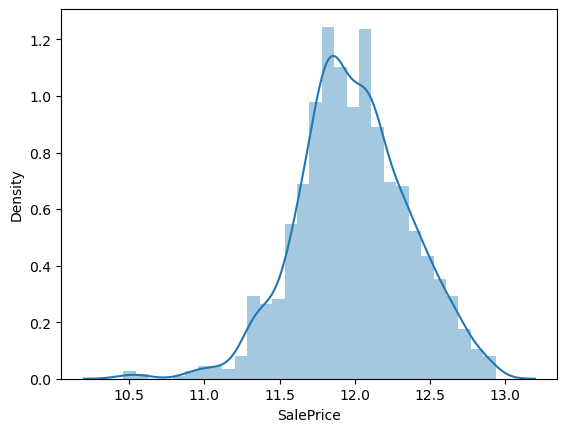

In [45]:
## Log transform the target variable
y = np.log(y)
sns.distplot(y)

#### Step 5.4 - Scaling features

In [46]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)

# scale
scaler = StandardScaler()

## Scale the numerical columns 
X_train_house = scaler.fit_transform(X_train)
X_test_house = scaler.transform(X_test)

#### Step 6 - Linear Regression

#### Step 6.1 - Using RFE for Feature Selection and Training the model

In [47]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train_house, y_train)
rfe = RFE(lm, n_features_to_select = 50)
rfe = rfe.fit(X_train_house, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 109),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 6),
 ('MasVnrArea', False, 213),
 ('BsmtFinSF1', False, 191),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 90),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 210),
 ('FullBath', False, 37),
 ('HalfBath', False, 63),
 ('BedroomAbvGr', False, 153),
 ('KitchenAbvGr', False, 9),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 141),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 35),
 ('OpenPorchSF', False, 50),
 ('EnclosedPorch', False, 36),
 ('3SsnPorch', False, 148),
 ('ScreenPorch', False, 34),
 ('PoolArea', False, 55),
 ('MoSold', False, 189),
 ('YrSold', False, 172),
 ('MSSubClass_1-1/2 STORY - UNFINISHED', False, 57),
 ('MSSubClass_1-STORY < 1945', False, 39),
 ('MSSubClass_1-STORY >= 1946', False, 38),
 ('MSSubClass_1-STORY PUD', False, 178),
 ('MSSubClass_1-STORY W/FINISHED', False, 81

In [48]:
## Identifying features suggested by RFE 
selectedfeatures = X_train.columns[rfe.support_]
selectedfeatures

Index(['LotArea', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSSubClass_DUPLEX',
       'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'BldgType_Duplex',
       'HouseStyle_2Story', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_CBlock', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_PConc', 'BsmtQual_NA', 'BsmtCond_NA',
       'BsmtExposure_NA', 'BsmtFinType1_NA', 'BsmtFinType2_NA',
       'GarageType_NA', 'GarageFinish_NA', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_NA', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_NA', 'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [49]:
#### Inference
#### The following features have been selected by RFE 
#### ['LotArea', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
####       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSSubClass_DUPLEX',
####      'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'BldgType_Duplex',
####       'HouseStyle_2Story', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
####       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
####       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
####       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
####       'Exterior1st_CBlock', 'MasVnrType_BrkFace', 'MasVnrType_None',
####      'MasVnrType_Stone', 'Foundation_PConc', 'BsmtQual_NA', 'BsmtCond_NA',
####       'BsmtExposure_NA', 'BsmtFinType1_NA', 'BsmtFinType2_NA',
####       'GarageType_NA', 'GarageFinish_NA', 'GarageQual_Fa', 'GarageQual_Gd',
####       'GarageQual_NA', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
####       'GarageCond_NA', 'GarageCond_Po', 'GarageCond_TA']

#### 6.2 Using Selected Features to train the model

In [50]:
# importing Stats Model python module
import statsmodels.api as sm  

# Creating a dataframe with RFE selected variables
X_train_selfeatures = X_train[selectedfeatures] 
X_test_selfeatures = X_test[selectedfeatures]

## Scale the numerical columns 
X_train_selfeatures_scaled = scaler.fit_transform(X_train_selfeatures)
X_test_selfeatures_scaled = scaler.transform(X_test_selfeatures)

print(X_train_selfeatures_scaled.shape)

# Running the linear model for training
lm_statsmodel = GetLinearRegression(X_train_selfeatures_scaled, y_train)

# Understanding the summary of the linear model training output
print(lm_statsmodel.summary())


(960, 50)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     186.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:21:17   Log-Likelihood:                 690.43
No. Observations:                 960   AIC:                            -1295.
Df Residuals:                     917   BIC:                            -1086.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9825      0.004   3078.32

In [51]:
#### Inference from Linear Regression Summary Output

##### 1) R-Squared value is 0.895 and Adjusted R-squared value is 0.890. 
#####    This means that 89.5% or 89% of the variance is explained by the predictor variables used in the model
##### 2) In Linear Regression, NULL hypothesis is that the value of all the coefficient is 0. P-value > 0.05 suggests 
#####    the probability that the NULL hypothesis is true. p-values of certain features are outside the acceptable range 
#####    This can be handled by calculating Variance Inflation Factor and iteratively removing the features that have a 
#####    strong relationship with other features

#### Step 6.3 - Predicting using Test dataset using Linear Regression

In [52]:
## Adding a constant variable 
X_train_house_const = sm.add_constant(X_train_selfeatures_scaled, has_constant = False)
y_train_pred = lm_statsmodel.predict(X_train_house_const)

## Adding a constant variable 
X_test_house_const = sm.add_constant(X_test_selfeatures_scaled, has_constant = False)
y_test_pred = lm_statsmodel.predict(X_test_house_const)


#### 6.4 - Calculating Linear Regression Metrics for Test data

In [53]:
metric_linearregression = []

r2_train_lr = r2_score(y_train, y_train_pred)
metric_linearregression.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
metric_linearregression.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
metric_linearregression.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
metric_linearregression.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
metric_linearregression.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
metric_linearregression.append(mse_test_lr**0.5)

print("Linear Regression Metrics")
print("R2 Score (Train) = ", r2_train_lr)
print("R2 Score (Test) = ", r2_test_lr)
print("Residual Sum of Squares (Train) = ", rss1_lr)
print("Residual Sum of Squares (Test) = ", rss2_lr)
print("Mean Squared Error (Train) = ", mse_train_lr)
print("Mean Squared Error (Test) = ", mse_test_lr)

Linear Regression Metrics
R2 Score (Train) =  0.8949766315223461
R2 Score (Test) =  0.8645874655948207
Residual Sum of Squares (Train) =  13.338523345936137
Residual Sum of Squares (Test) =  8.02612055148634
Mean Squared Error (Train) =  0.01389429515201681
Mean Squared Error (Test) =  0.019480875124966844


#### Step 7 - Ridge Regression

#### Step 7.1 - Perform Cross Validation to identify the optimal Alpha Value

In [54]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_house, y_train) 

print(model_cv.best_params_)
print(model_cv.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 500.0}
-0.09163526219992314


#### 7.2 - Fit the model using the optimum Alpha value

In [55]:
#Fitting Ridge model for alpha = 8.0 and printing coefficients which have been penalised

alpha = 500.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_house, y_train)
print(ridge.coef_)

[ 1.43501382e-02  2.21553670e-02  1.19428258e-02  1.74208142e-02
  7.18621492e-03  2.16194131e-02  6.90730770e-03  3.51021688e-02
  1.71277714e-02 -1.05820079e-04  1.27500429e-02 -7.99065590e-04
  2.21172614e-02  1.34141480e-02  9.73081910e-03 -5.26641815e-03
  2.86867854e-02  2.23428735e-02  8.73110406e-03  2.45299454e-02
  1.16090988e-02  1.38816239e-02  4.77148268e-03  4.38923838e-03
  1.00225918e-02  5.98543261e-03  2.30691295e-03 -1.26123182e-03
 -6.88736027e-04 -1.18600301e-02 -2.22682048e-04  9.35040932e-04
 -1.08253299e-03 -4.63684985e-03  2.18867609e-03  6.72893317e-03
  5.48088954e-03 -9.44156959e-03  5.39615233e-04 -1.90291337e-03
 -2.20073546e-03 -1.53384154e-03  7.59627128e-03  2.38456276e-03
  7.08589205e-03 -6.04385978e-03  6.40155758e-03  3.51106751e-03
  7.73904070e-04 -4.34831695e-03  5.99269647e-04 -4.70910920e-03
 -1.05125869e-03  0.00000000e+00  5.16293993e-03 -4.39108198e-03
 -5.79677429e-04 -4.79383438e-03  4.66159919e-03 -2.36824583e-03
  1.57969629e-03 -2.90133

#### 7.3 - Calculating Regression Metrics based on Ridge Regression

##### 7.3.1 - Predict both Train and Test datasets

In [56]:
y_pred_train = ridge.predict(X_train_house)
y_pred_test = ridge.predict(X_test_house)
print(y_pred_train)

[11.78763418 11.82191372 12.34819686 11.85730145 12.13349511 11.86516319
 11.55278027 11.92339109 11.85061109 11.47800341 11.4490121  11.71186539
 12.5107897  12.15231171 12.44089613 11.95967818 11.88999778 12.24140487
 11.82788879 11.70400473 11.77342548 12.22122396 12.69659171 11.890475
 12.05363184 12.40892226 11.87292158 11.93972374 11.8276854  12.41589263
 12.37766081 11.50374366 12.43773457 11.72686096 11.71824484 11.80711067
 11.80378558 12.4881479  11.80822716 11.83607168 12.56939275 12.08717882
 12.00063233 12.16567738 12.40997313 11.11894045 11.83994245 12.104075
 12.29332785 11.53400976 12.06093028 11.74088965 11.577379   11.88862983
 11.91068893 12.44927461 11.68419636 11.71568381 12.18142673 12.27296675
 11.93701937 11.92639751 12.47405623 11.48710837 11.8272831  12.29239019
 11.74554668 12.06101108 12.10449261 11.80224612 11.72140155 12.08106998
 11.19488202 11.64622413 12.01000246 11.6310554  12.20901383 12.15827679
 12.17987903 12.44973835 11.96569585 12.29931095 12.157

In [57]:
### Plot Actual vs Predicted Values For Ridge Regression

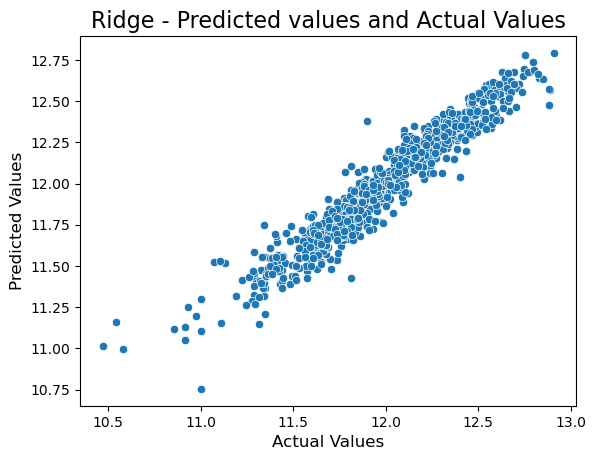

In [58]:
sns.scatterplot(y_train,y_pred_train)
plt.title('Ridge - Predicted values and Actual Values', fontdict={'fontsize': 16})
plt.xlabel('Actual Values', fontdict={'fontsize': 12})
plt.ylabel('Predicted Values', fontdict={'fontsize': 12})
plt.show()

##### 7.3.2 - Calculate Metrics

In [59]:
metric_ridge = []

r2_train_lr = r2_score(y_train, y_pred_train)
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_ridge.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_ridge.append(mse_test_lr**0.5)

print("Ridge Metrics")
print("R2 Score (Train) = ", r2_train_lr)
print("R2 Score (Test) = ", r2_test_lr)
print("Residual Sum of Squares (Train) = ", rss1_lr)
print("Residual Sum of Squares (Test) = ", rss2_lr)
print("Mean Squared Error (Train) = ", mse_train_lr)
print("Mean Squared Error (Test) = ", mse_test_lr)

Ridge Metrics
R2 Score (Train) =  0.9203322165790413
R2 Score (Test) =  0.8678303949722511
Residual Sum of Squares (Train) =  10.118229918568492
Residual Sum of Squares (Test) =  7.833906867298641
Mean Squared Error (Train) =  0.01053982283184218
Mean Squared Error (Test) =  0.019014337056550097


In [60]:
#### Print Coefficient Values

In [61]:
# Coefficients list
ridge_parameters = list(ridge.coef_)
#Inserting Y Intercept to model parameters list
ridge_parameters.insert(0, ridge.intercept_)
# Rounding off the coefficients
ridge_parameters = [round(i,3) for i in ridge_parameters]
len(ridge_parameters)

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, ridge_parameters))

# Filter for columns having coefficients greater than 1
ridge_params_df = pd.DataFrame({'Parameters':cols, 'Coefficients':ridge_parameters})
ridge_params_df = ridge_params_df.sort_values(by=['Coefficients'], ascending=False)
ridge_params_df

Parameters  Coefficients
0                               constant      11.98300
8                            TotalBsmtSF       0.03500
17                          TotRmsAbvGrd       0.02900
20                            GarageCars       0.02500
116                        OverallQual_8       0.02400
13                              FullBath       0.02200
18                            Fireplaces       0.02200
2                                LotArea       0.02200
6                             BsmtFinSF1       0.02200
66                  Neighborhood_Crawfor       0.01700
4                           YearRemodAdd       0.01700
9                               2ndFlrSF       0.01700
117                        OverallQual_9       0.01600
215                         CentralAir_Y       0.01500
1                            LotFrontage       0.01400
22                           OpenPorchSF       0.01400
261                 SaleCondition_Normal       0.01300
82                  Neighborhood_StoneBr       0.01300
14                              HalfBath       0.01300
11                          BsmtFullBath       0.01300
124                        OverallCond_7       0.01300
139                  Exterior1st_BrkFace       0.01200
3                              YearBuilt       0.01200
21                            WoodDeckSF       0.01200
115                        OverallQual_7       0.01100
76                  Neighborhood_NridgHt       0.01000
190                      BsmtExposure_Gd       0.01000
15                          BedroomAbvGr       0.01000
25                           ScreenPorch       0.01000
118                       OverallQual_10       0.00900
195                     BsmtFinType1_GLQ       0.00900
86                       Condition1_Norm       0.00900
19                           GarageYrBlt       0.00900
171                         ExterQual_Gd       0.00800
178                     Foundation_PConc       0.00800
43                           MSZoning_FV       0.00800
250                         SaleType_CWD       0.00800
262                SaleCondition_Partial       0.00800
7                              BsmtUnfSF       0.00700
5                             MasVnrArea       0.00700
75                  Neighborhood_NoRidge       0.00700
169                     MasVnrType_Stone       0.00700
45                           MSZoning_RL       0.00700
81                  Neighborhood_Somerst       0.00700
255                         SaleType_New       0.00700
126                        OverallCond_9       0.00700
36             MSSubClass_2-STORY < 1945       0.00700
180                     Foundation_Stone       0.00600
47                           Street_Pave       0.00600
125                        OverallCond_8       0.00600
26                              PoolArea       0.00600
64                  Neighborhood_ClearCr       0.00500
59                         LandSlope_Mod       0.00500
95                       Condition2_PosA       0.00500
186                          BsmtCond_Gd       0.00500
231                   GarageType_BuiltIn       0.00500
229                    GarageType_Attchd       0.00500
146                    Exterior1st_Stone       0.00500
249                         PavedDrive_Y       0.00500
37            MSSubClass_2-STORY >= 1946       0.00500
23                         EnclosedPorch       0.00500
55                     LotConfig_CulDSac       0.00500
84                  Neighborhood_Veenker       0.00400
155                  Exterior2nd_CmentBd       0.00400
247                        GarageCond_TA       0.00400
189                          BsmtCond_TA       0.00400
252                       SaleType_ConLD       0.00400
207                         Heating_GasW       0.00400
24                             3SsnPorch       0.00400
48                          LotShape_IR2       0.00400
239                        GarageQual_Gd       0.00400
141                  Exterior1st_CemntBd       0.00400
201            

#### 8 - Lasso Regression

#### Step 8.1 - Perform Cross Validation to identify the optimal Alpha Value

In [62]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_house, y_train) 

print(model_cv.best_params_)
print(model_cv.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.01}
-0.09130814793397274


#### 8.2 - Fit the model using the optimum Alpha value

In [63]:
alpha =0.01
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train_house, y_train) 

Lasso(alpha=0.01)

#### 8.3 - Calculating Regression Metrics based on Lasso Regression

##### 8.3.1 - Predict both Train and Test datasets

In [64]:
y_pred_train = lasso.predict(X_train_house)
y_pred_test = lasso.predict(X_test_house)

In [65]:
### Compare Actual Values and Predicted Values from Lasso Regression

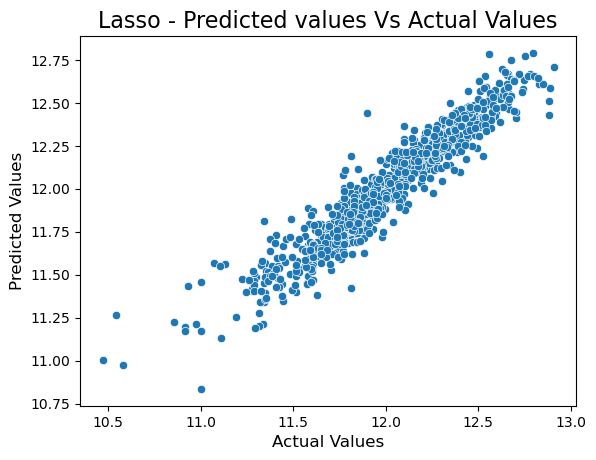

In [66]:
sns.scatterplot(y_train,y_pred_train)
plt.title('Lasso - Predicted values Vs Actual Values', fontdict={'fontsize': 16})
plt.xlabel('Actual Values', fontdict={'fontsize': 12})
plt.ylabel('Predicted Values', fontdict={'fontsize': 12})
plt.show()

In [67]:
metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_test_lr**0.5)

print("Lasso Metrics")
print("R2 Score (Train) = ", r2_train_lr)
print("R2 Score (Test) = ", r2_test_lr)
print("Residual Sum of Squares (Train) = ", rss1_lr)
print("Residual Sum of Squares (Test) = ", rss2_lr)
print("Mean Squared Error (Train) = ", mse_train_lr)
print("Mean Squared Error (Test) = ", mse_test_lr)

Lasso Metrics
R2 Score (Train) =  0.8977261123947713
R2 Score (Test) =  0.8639256337569198
Residual Sum of Squares (Train) =  12.98932473102166
Residual Sum of Squares (Test) =  8.065348398000978
Mean Squared Error (Train) =  0.01353054659481423
Mean Squared Error (Test) =  0.019576088344662568


In [68]:
#### 8.4 - Identify features selected by Lasso regression

In [69]:
# Coefficients list
lasso_parameters = list(lasso.coef_)
#Inserting Y Intercept to model parameters list
lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
lasso_parameters = [round(i,3) for i in lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))

# Filter for columns having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Parameters':cols, 'Coefficients':lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coefficients'] != 0]
print("Count of Features Selected - ",len(lasso_params_df))
lasso_params_df = lasso_params_df.sort_values(by=['Coefficients'], ascending=False)
lasso_params_df

Count of Features Selected -  69


Parameters  Coefficients
0                     constant      11.98300
8                  TotalBsmtSF       0.07300
20                  GarageCars       0.05000
9                     2ndFlrSF       0.04200
116              OverallQual_8       0.03900
17                TotRmsAbvGrd       0.03400
4                 YearRemodAdd       0.03100
6                   BsmtFinSF1       0.03100
18                  Fireplaces       0.03000
2                      LotArea       0.02600
13                    FullBath       0.02300
3                    YearBuilt       0.02100
66        Neighborhood_Crawfor       0.02100
117              OverallQual_9       0.02000
215               CentralAir_Y       0.01900
115              OverallQual_7       0.01900
22                 OpenPorchSF       0.01300
124              OverallCond_7       0.01100
1                  LotFrontage       0.00900
14                    HalfBath       0.00900
21                  WoodDeckSF       0.00900
139        Exterior1st_BrkFace       0.00700
195           BsmtFinType1_GLQ       0.00600
118             OverallQual_10       0.00600
82        Neighborhood_StoneBr       0.00600
25                 ScreenPorch       0.00600
255               SaleType_New       0.00500
190            BsmtExposure_Gd       0.00400
43                 MSZoning_FV       0.00300
178           Foundation_PConc       0.00300
261       SaleCondition_Normal       0.00300
55           LotConfig_CulDSac       0.00300
250               SaleType_CWD       0.00200
247              GarageCond_TA       0.00200
11                BsmtFullBath       0.00200
229          GarageType_Attchd       0.00100
249               PavedDrive_Y       0.00100
262      SaleCondition_Partial       0.00100
26                    PoolArea       0.00100
86             Condition1_Norm       0.00100
101             BldgType_Twnhs      -0.00100
240              GarageQual_NA      -0.00100
193            BsmtExposure_No      -0.00100
211               HeatingQC_Fa      -0.00200
234              GarageType_NA      -0.00200
185                BsmtQual_TA      -0.00200
227             Functional_Sev      -0.00200
71        Neighborhood_Mitchel      -0.00200
208               Heating_Grav      -0.00200
69         Neighborhood_IDOTRR      -0.00300
70        Neighborhood_MeadowV      -0.00300
226             Functional_Mod      -0.00400
214               HeatingQC_TA      -0.00500
77        Neighborhood_OldTown      -0.00500
237           GarageFinish_Unf      -0.00600
46                 MSZoning_RM      -0.00700
38      MSSubClass_2-STORY PUD      -0.00700
223            Functional_Maj2      -0.00700
113              OverallQual_5      -0.00800
121              OverallCond_4      -0.00800
30   MSSubClass_1-STORY < 1945      -0.00900
111              OverallQual_3      -0.01000
170               ExterQual_Fa      -0.01000
222             KitchenQual_TA      -0.01100
110              OverallQual_2      -0.01100
16                KitchenAbvGr      -0.01100
172               ExterQual_TA      -0.01700
112              OverallQual_4      -0.01800
120              OverallCond_3      -0.02300

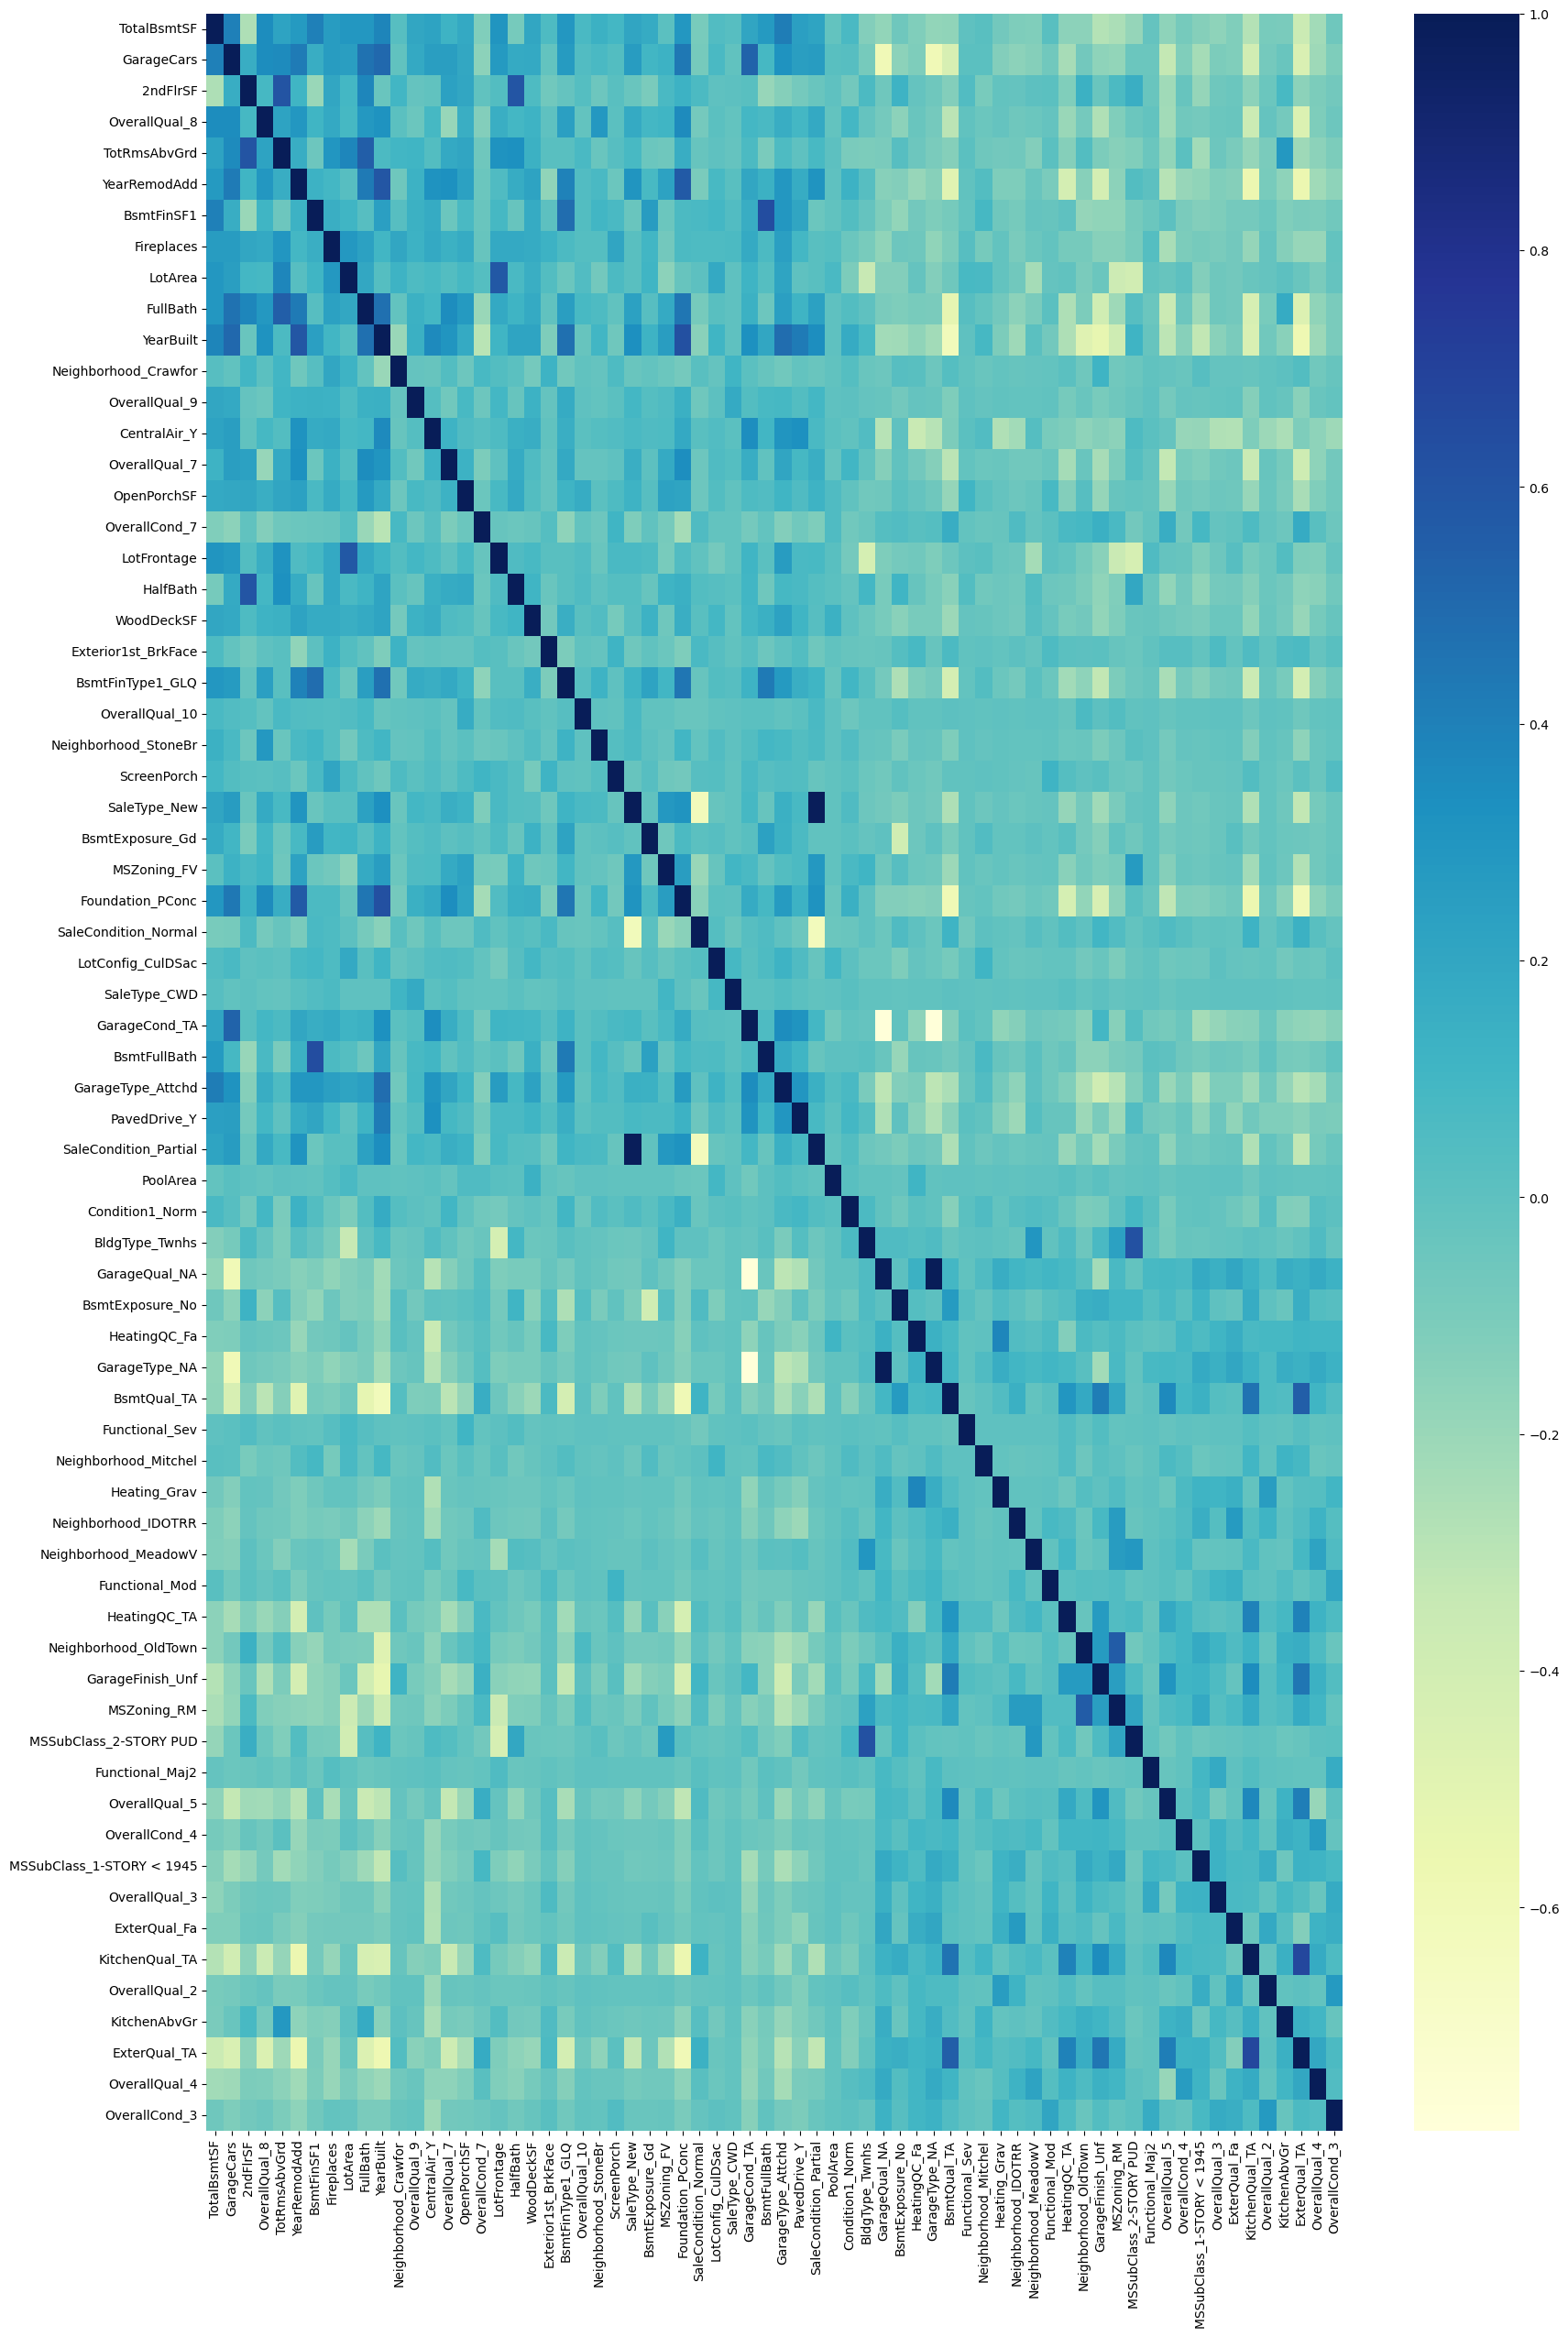

In [70]:
lasso_features = []
for x in lasso_params_df.index:
    lasso_features.append(lasso_params_df['Parameters'][x])

lasso_features = lasso_features[1:]
lasso_features
#Checking correlation between the predictors
plt.figure(figsize=(20,30))
# Heatmap
sns.heatmap(X_train[lasso_features].corr(), cmap="YlGnBu", annot=False)
plt.show()

#### 9 - Comparing Regression Metrics between Linear Regression, Ridge and Lasso

In [71]:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_linearregression
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)            0.89498           0.92033           0.89773
1   R2 Score (Test)            0.86459           0.86783           0.86393
2       RSS (Train)           13.33852          10.11823          12.98932
3        RSS (Test)            8.02612           7.83391           8.06535
4       MSE (Train)            0.11787           0.10266           0.11632
5        MSE (Test)            0.13957           0.13789           0.13991

#### 10 - Comparing coefficients between Ridge and Lasso Regression
#### Inference - 
#### Ridge Regression tries to keep the coefficients closer to 0 but not 0
#### Lasso Regression eliminates features by keeping the coefficient values to 0 

In [72]:
betas = pd.DataFrame(index=X_train.columns)

In [73]:
betas.rows = X_train.columns

In [74]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [75]:
pd.set_option('display.max_rows', None)
betas

Ridge    Lasso
LotFrontage                          0.01435  0.00916
LotArea                              0.02216  0.02598
YearBuilt                            0.01194  0.02119
YearRemodAdd                         0.01742  0.03150
MasVnrArea                           0.00719  0.00000
BsmtFinSF1                           0.02162  0.03077
BsmtUnfSF                            0.00691 -0.00000
TotalBsmtSF                          0.03510  0.07293
2ndFlrSF                             0.01713  0.04246
LowQualFinSF                        -0.00011 -0.00000
BsmtFullBath                         0.01275  0.00166
BsmtHalfBath                        -0.00080  0.00000
FullBath                             0.02212  0.02345
HalfBath                             0.01341  0.00857
BedroomAbvGr                         0.00973  0.00000
KitchenAbvGr                        -0.00527 -0.01067
TotRmsAbvGrd                         0.02869  0.03412
Fireplaces                           0.02234  0.03007
GarageYrBlt                          0.00873  0.00000
GarageCars                           0.02453  0.05013
WoodDeckSF                           0.01161  0.00875
OpenPorchSF                          0.01388  0.01308
EnclosedPorch                        0.00477  0.00000
3SsnPorch                            0.00439  0.00000
ScreenPorch                          0.01002  0.00558
PoolArea                             0.00599  0.00073
MoSold                               0.00231  0.00000
YrSold                              -0.00126 -0.00000
MSSubClass_1-1/2 STORY - UNFINISHED -0.00069  0.00000
MSSubClass_1-STORY < 1945           -0.01186 -0.00884
MSSubClass_1-STORY >= 1946          -0.00022 -0.00000
MSSubClass_1-STORY PUD               0.00094  0.00000
MSSubClass_1-STORY W/FINISHED       -0.00108 -0.00000
MSSubClass_2 FAMILY CONVERSION      -0.00464 -0.00000
MSSubClass_2-1/2 STORY               0.00219  0.00000
MSSubClass_2-STORY < 1945            0.00673  0.00000
MSSubClass_2-STORY >= 1946           0.00548  0.00000
MSSubClass_2-STORY PUD              -0.00944 -0.00687
MSSubClass_DUPLEX                    0.00054 -0.00000
MSSubClass_PUD - MULTILEVEL         -0.00190 -0.00000
MSSubClass_SPLIT FOYER              -0.00220 -0.00000
MSSubClass_SPLIT OR MULTI-LEVEL     -0.00153  0.00000
MSZoning_FV                          0.00760  0.00308
MSZoning_RH                          0.00238  0.00000
MSZoning_RL                          0.00709  0.00000
MSZoning_RM                         -0.00604 -0.00692
Street_Pave                          0.00640  0.00000
LotShape_IR2                         0.00351  0.00000
LotShape_IR3                         0.00077 -0.00000
LotShape_Reg                        -0.00435 -0.00000
LandContour_HLS                      0.00060  0.00000
LandContour_Low                     -0.00471 -0.00000
LandContour_Lvl                     -0.00105 -0.00000
Utilities_NoSeWa                     0.00000  0.00000
LotConfig_CulDSac                    0.00516  0.00292
LotConfig_FR2                       -0.00439 -0.00000
LotConfig_FR3                       -0.00058  0.00000
LotConfig_Inside                    -0.00479 -0.00000
LandSlope_Mod                        0.00466  0.00000
LandSlope_Sev                       -0.00237 -0.00000
Neighborhood_Blueste                 0.00158  0.00000
Neighborhood_BrDale                 -0.00290 -0.00000
Neighborhood_BrkSide                 0.00300  0.00000
Neighborhood_ClearCr                 0.00487  0.00000
Neighborhood_CollgCr                -0.00042  0.00000
Neighborhood_Crawfor                 0.01750  0.02124
Neighborhood_Edwards                -0.00843 -0.00000
Neighborhood_Gilbert                -0.00548 -0.00000
Neighborhood_IDOTRR                 -0.00789 -0.00329
Neighborhood_MeadowV                -0.01287 -0.00317
Neighborhood_Mitchel                -0.00701 -0.00181
Neighborhood_NAmes                  -0.00553 -0.00000
Neighborhood_NPkVill                -0.00075 -0.00000
Neighborhood_NWAmes                  0.0017

# Subjective Questions Evaluation

## Question 1 - Doubling the Alpha Values

### Ridge Regression 
#### Optimal Alpha - 500.0
#### Double Value - 1000.0

#### Fitting Model for Alpha = 1000.0 (Double the optimal Alpha value)

In [76]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha = 1000.0
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train_house, y_train)
print(ridge_double.coef_)

[ 1.36373623e-02  1.90187784e-02  9.64378462e-03  1.54720833e-02
  8.10792807e-03  1.78406886e-02  6.09970248e-03  2.83456147e-02
  1.39275813e-02 -5.89083286e-04  1.09521071e-02 -3.14375087e-04
  1.97989605e-02  1.10319911e-02  1.01409223e-02 -3.64960905e-03
  2.52371606e-02  2.08767905e-02  8.22168079e-03  2.11898018e-02
  1.03360954e-02  1.28732528e-02  3.25698475e-03  3.74713733e-03
  8.66759576e-03  4.46371116e-03  2.75121984e-03 -1.13279587e-03
 -5.93901609e-05 -1.07330000e-02  4.05667732e-05  1.00621327e-03
 -6.79515683e-04 -3.66765286e-03  2.27414069e-03  6.18256150e-03
  6.39034876e-03 -8.42437675e-03 -7.04713418e-06 -2.84742008e-03
 -1.73795170e-03 -9.06551838e-04  5.66825584e-03  1.65064879e-03
  7.04539047e-03 -7.42366433e-03  5.42386634e-03  2.78114431e-03
  6.34852206e-04 -5.49923908e-03  1.59097733e-03 -2.29813209e-03
 -1.10479834e-03  0.00000000e+00  4.67375962e-03 -3.31390843e-03
 -3.14580032e-04 -3.76495822e-03  4.07007251e-03 -1.70722235e-03
  1.24473177e-03 -3.56397

#### Predict using train and test data

In [77]:
y_pred_train = ridge_double.predict(X_train_house)
y_pred_test = ridge_double.predict(X_test_house)

#### Gather Regression metrics post Ridge regularization 

In [78]:
metric_ridge_double = []

r2_train_lr = r2_score(y_train, y_pred_train)
metric_ridge_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric_ridge_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_ridge_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_ridge_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_ridge_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_ridge_double.append(mse_test_lr**0.5)

print("Ridge Metrics")
print("R2 Score (Train) = ", r2_train_lr)
print("R2 Score (Test) = ", r2_test_lr)
print("Residual Sum of Squares (Train) = ", rss1_lr)
print("Residual Sum of Squares (Test) = ", rss2_lr)
print("Mean Squared Error (Train) = ", mse_train_lr)
print("Mean Squared Error (Test) = ", mse_test_lr)

Ridge Metrics
R2 Score (Train) =  0.9009701478566837
R2 Score (Test) =  0.8531577102801681
Residual Sum of Squares (Train) =  12.577315067163186
Residual Sum of Squares (Test) =  8.703580687893659
Mean Squared Error (Train) =  0.013101369861628319
Mean Squared Error (Test) =  0.021125195844402086


#### Print coefficient values post Ridge regularization

In [79]:
# Coefficients list
ridge_parameters = list(ridge_double.coef_)
#Inserting Y Intercept to model parameters list
ridge_parameters.insert(0, ridge_double.intercept_)
# Rounding off the coefficients
ridge_parameters = [round(i,3) for i in ridge_parameters]
ridge_parameters
#len(ridge_parameters)

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, ridge_parameters))

# Filter for columns having coefficients greater than 1
ridge_params_df = pd.DataFrame({'Parameters':cols, 'Coefficients':ridge_parameters})
#ridge_params_df = ridge_params_df.sort_values(by=['Coefficients'], ascending=False)
ridge_params_df

Parameters  Coefficients
0                               constant      11.98300
1                            LotFrontage       0.01400
2                                LotArea       0.01900
3                              YearBuilt       0.01000
4                           YearRemodAdd       0.01500
5                             MasVnrArea       0.00800
6                             BsmtFinSF1       0.01800
7                              BsmtUnfSF       0.00600
8                            TotalBsmtSF       0.02800
9                               2ndFlrSF       0.01400
10                          LowQualFinSF      -0.00100
11                          BsmtFullBath       0.01100
12                          BsmtHalfBath      -0.00000
13                              FullBath       0.02000
14                              HalfBath       0.01100
15                          BedroomAbvGr       0.01000
16                          KitchenAbvGr      -0.00400
17                          TotRmsAbvGrd       0.02500
18                            Fireplaces       0.02100
19                           GarageYrBlt       0.00800
20                            GarageCars       0.02100
21                            WoodDeckSF       0.01000
22                           OpenPorchSF       0.01300
23                         EnclosedPorch       0.00300
24                             3SsnPorch       0.00400
25                           ScreenPorch       0.00900
26                              PoolArea       0.00400
27                                MoSold       0.00300
28                                YrSold      -0.00100
29   MSSubClass_1-1/2 STORY - UNFINISHED      -0.00000
30             MSSubClass_1-STORY < 1945      -0.01100
31            MSSubClass_1-STORY >= 1946       0.00000
32                MSSubClass_1-STORY PUD       0.00100
33         MSSubClass_1-STORY W/FINISHED      -0.00100
34        MSSubClass_2 FAMILY CONVERSION      -0.00400
35                MSSubClass_2-1/2 STORY       0.00200
36             MSSubClass_2-STORY < 1945       0.00600
37            MSSubClass_2-STORY >= 1946       0.00600
38                MSSubClass_2-STORY PUD      -0.00800
39                     MSSubClass_DUPLEX      -0.00000
40           MSSubClass_PUD - MULTILEVEL      -0.00300
41                MSSubClass_SPLIT FOYER      -0.00200
42       MSSubClass_SPLIT OR MULTI-LEVEL      -0.00100
43                           MSZoning_FV       0.00600
44                           MSZoning_RH       0.00200
45                           MSZoning_RL       0.00700
46                           MSZoning_RM      -0.00700
47                           Street_Pave       0.00500
48                          LotShape_IR2       0.00300
49                          LotShape_IR3       0.00100
50                          LotShape_Reg      -0.00500
51                       LandContour_HLS       0.00200
52                       LandContour_Low      -0.00200
53                       LandContour_Lvl      -0.00100
54                      Utilities_NoSeWa       0.00000
55                     LotConfig_CulDSac       0.00500
56                         LotConfig_FR2      -0.00300
57                         LotConfig_FR3      -0.00000
58                      LotConfig_Inside      -0.00400
59                         LandSlope_Mod       0.00400
60                         LandSlope_Sev      -0.00200
61                  Neighborhood_Blueste       0.00100
62                   Neighborhood_BrDale      -0.00400
63                  Neighborhood_BrkSide       0.00100
64                  Neighborhood_ClearCr       0.00400
65                  Neighborhood_CollgCr      -0.00000
66                  Neighborhood_Crawfor       0.01500
67                  Neighborhood_Edwards      -0.00700
68                  Neighborhood_Gilbert      -0.00400
69                   Neighborhood_IDOTRR      -0.00700
70                  Neighborhood_MeadowV      -0.01100
71                  Neighborhood_Mitchel      -0.00500
72             

### Lasso Regression 
#### Optimal Alpha - 0.01
#### Double Value - 0.02

#### Fit the model using Alpha value = 0.2 (double the optimal value) using Lasso

In [80]:
alpha =0.02
lasso_double = Lasso(alpha=alpha)      
lasso_double.fit(X_train_house, y_train) 

Lasso(alpha=0.02)

#### Predict using train and test data

In [81]:
y_pred_train = lasso_double.predict(X_train_house)
y_pred_test = lasso_double.predict(X_test_house)

#### Calculate Regression Metrics post Lasso regularization

In [82]:
metric_lasso_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric_lasso_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric_lasso_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_lasso_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_lasso_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_lasso_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_lasso_double.append(mse_test_lr**0.5)

print("Lasso Metrics")
print("R2 Score (Train) = ", r2_train_lr)
print("R2 Score (Test) = ", r2_test_lr)
print("Residual Sum of Squares (Train) = ", rss1_lr)
print("Residual Sum of Squares (Test) = ", rss2_lr)
print("Mean Squared Error (Train) = ", mse_train_lr)
print("Mean Squared Error (Test) = ", mse_test_lr)

Lasso Metrics
R2 Score (Train) =  0.8585980983401617
R2 Score (Test) =  0.8272770745411395
Residual Sum of Squares (Train) =  17.958789494081294
Residual Sum of Squares (Test) =  10.237567946185488
Mean Squared Error (Train) =  0.018707072389668015
Mean Squared Error (Test) =  0.02484846588879973


#### Print list of coefficients

In [83]:
# Coefficients list
lasso_parameters = list(lasso_double.coef_)
#Inserting Y Intercept to model parameters list
lasso_parameters.insert(0, lasso_double.intercept_)
# Rounding off the coefficients
lasso_parameters = [round(i,3) for i in lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))

# Filter for columns having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Parameters':cols, 'Coefficients':lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coefficients'] != 0]
print("Count of Features Selected - ",len(lasso_params_df))
lasso_params_df = lasso_params_df.sort_values(by=['Coefficients'], ascending=False)
lasso_params_df

Count of Features Selected -  36


Parameters  Coefficients
0                     constant      11.98300
8                  TotalBsmtSF       0.07800
20                  GarageCars       0.06000
4                 YearRemodAdd       0.03800
9                     2ndFlrSF       0.03600
18                  Fireplaces       0.03600
17                TotRmsAbvGrd       0.03400
116              OverallQual_8       0.02800
6                   BsmtFinSF1       0.02700
2                      LotArea       0.02600
13                    FullBath       0.02400
215               CentralAir_Y       0.02100
3                    YearBuilt       0.01700
66        Neighborhood_Crawfor       0.01400
22                 OpenPorchSF       0.01000
115              OverallQual_7       0.00900
117              OverallQual_9       0.00800
14                    HalfBath       0.00700
195           BsmtFinType1_GLQ       0.00600
229          GarageType_Attchd       0.00400
1                  LotFrontage       0.00300
21                  WoodDeckSF       0.00200
178           Foundation_PConc       0.00200
185                BsmtQual_TA      -0.00200
110              OverallQual_2      -0.00300
121              OverallCond_4      -0.00400
237           GarageFinish_Unf      -0.00500
16                KitchenAbvGr      -0.00500
111              OverallQual_3      -0.00500
30   MSSubClass_1-STORY < 1945      -0.00600
170               ExterQual_Fa      -0.00700
46                 MSZoning_RM      -0.01000
112              OverallQual_4      -0.01200
222             KitchenQual_TA      -0.01400
120              OverallCond_3      -0.02100
172               ExterQual_TA      -0.02300

#### Compare Metrics across the different model fits

In [84]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']        
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression (Alpha=500.0)')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression (Alpha=0.01)')
rg_metric_double = pd.Series(metric_ridge_double, name = 'Ridge Regression (Alpha=1000.0)')
ls_metric_double = pd.Series(metric_lasso_double, name = 'Lasso Regression (Alpha=0.02)')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric_double,ls_metric_double], axis = 1)

final_metric

Metric  Ridge Regression (Alpha=500.0)  \
0  R2 Score (Train)                         0.92033   
1   R2 Score (Test)                         0.86783   
2       RSS (Train)                        10.11823   
3        RSS (Test)                         7.83391   
4       MSE (Train)                         0.10266   
5        MSE (Test)                         0.13789   

   Lasso Regression (Alpha=0.01)  Ridge Regression (Alpha=1000.0)  \
0                        0.89773                          0.90097   
1                        0.86393                          0.85316   
2                       12.98932                         12.57732   
3                        8.06535                          8.70358   
4                        0.11632                          0.11446   
5                        0.13991                          0.14535   

   Lasso Regression (Alpha=0.02)  
0                        0.85860  
1                        0.82728  
2                       17.95879  
3                       10.23757  
4                        0.13677  
5                        0.15763

In [85]:
betas['Ridge Double Alpha'] = ridge_double.coef_
betas['Lasso Double Alpha'] = lasso_double.coef_
pd.set_option('display.max_rows', None)
betas

Ridge    Lasso  Ridge Double Alpha  \
LotFrontage                          0.01435  0.00916             0.01364   
LotArea                              0.02216  0.02598             0.01902   
YearBuilt                            0.01194  0.02119             0.00964   
YearRemodAdd                         0.01742  0.03150             0.01547   
MasVnrArea                           0.00719  0.00000             0.00811   
BsmtFinSF1                           0.02162  0.03077             0.01784   
BsmtUnfSF                            0.00691 -0.00000             0.00610   
TotalBsmtSF                          0.03510  0.07293             0.02835   
2ndFlrSF                             0.01713  0.04246             0.01393   
LowQualFinSF                        -0.00011 -0.00000            -0.00059   
BsmtFullBath                         0.01275  0.00166             0.01095   
BsmtHalfBath                        -0.00080  0.00000            -0.00031   
FullBath                             0.02212  0.02345             0.01980   
HalfBath                             0.01341  0.00857             0.01103   
BedroomAbvGr                         0.00973  0.00000             0.01014   
KitchenAbvGr                        -0.00527 -0.01067            -0.00365   
TotRmsAbvGrd                         0.02869  0.03412             0.02524   
Fireplaces                           0.02234  0.03007             0.02088   
GarageYrBlt                          0.00873  0.00000             0.00822   
GarageCars                           0.02453  0.05013             0.02119   
WoodDeckSF                           0.01161  0.00875             0.01034   
OpenPorchSF                          0.01388  0.01308             0.01287   
EnclosedPorch                        0.00477  0.00000             0.00326   
3SsnPorch                            0.00439  0.00000             0.00375   
ScreenPorch                          0.01002  0.00558             0.00867   
PoolArea                             0.00599  0.00073             0.00446   
MoSold                               0.00231  0.00000             0.00275   
YrSold                              -0.00126 -0.00000            -0.00113   
MSSubClass_1-1/2 STORY - UNFINISHED -0.00069  0.00000            -0.00006   
MSSubClass_1-STORY < 1945           -0.01186 -0.00884            -0.01073   
MSSubClass_1-STORY >= 1946          -0.00022 -0.00000             0.00004   
MSSubClass_1-STORY PUD               0.00094  0.00000             0.00101   
MSSubClass_1-STORY W/FINISHED       -0.00108 -0.00000            -0.00068   
MSSubClass_2 FAMILY CONVERSION      -0.00464 -0.00000            -0.00367   
MSSubClass_2-1/2 STORY               0.00219  0.00000             0.00227   
MSSubClass_2-STORY < 1945            0.00673  0.00000             0.00618   
MSSubClass_2-STORY >= 1946           0.00548  0.00000             0.00639   
MSSubClass_2-STORY PUD              -0.00944 -0.00687            -0.00842   
MSSubClass_DUPLEX                    0.00054 -0.00000            -0.00001   
MSSubClass_PUD - MULTILEVEL         -0.00190 -0.00000            -0.00285   
MSSubClass_SPLIT FOYER              -0.00220 -0.00000            -0.00174   
MSSubClass_SPLIT OR MULTI-LEVEL     -0.00153  0.00000            -0.00091   
MSZoning_FV                          0.00760  0.00308             0.00567   
MSZoning_RH                          0.00238  0.00000             0.00165   
MSZoning_RL                          0.00709  0.00000             0.00705   
MSZoning_RM                         -0.00604 -0.00692            -0.00742   
Street_Pave                          0.00640  0.00000             0.00542   
LotShape_IR2                         0.00351  0.00000             0.00278   
LotShape_IR3                         0.00077 -0.00000             0.00063   
LotShape_Reg                        -0.00435 -0.00000            -0.00550   
LandContour_HLS                      0.00060  0.00000             0.00159   
LandContour_Low                    

## Question 3 - Removing Top 5 Predictor Variables

### Lasso Regularization

#### Top 5 Predictor Variables in Ridge - TotalBsmtSF, GarageCars, YearRemodAdd, 2ndFlrSF, Fireplaces

In [86]:
#### Remove Top 5 predictor variables from Train and Test dataset

In [87]:
X_train_limited = X_train.drop(['TotalBsmtSF', 'GarageCars', 'YearRemodAdd', '2ndFlrSF', 'Fireplaces'], axis=1)
X_test_limited = X_test.drop(['TotalBsmtSF', 'GarageCars', 'YearRemodAdd', '2ndFlrSF', 'Fireplaces'], axis=1)

In [88]:
#### Apply scaling

In [89]:
## Scale the numerical columns 
X_train_lnew = scaler.fit_transform(X_train_limited)
X_test_lnew = scaler.transform(X_test_limited)

In [90]:
#### Lasso Regularization

In [91]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0 ]}

lasso_limited = Lasso()

# cross validation
folds = 5
model_lnew = GridSearchCV(estimator = lasso_limited, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_lnew.fit(X_train_limited, y_train) 

print(model_lnew.best_params_)
print(model_lnew.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.001}
-0.09519909393658235


In [92]:
#### Train and Predict

In [93]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha = 0.01
lasso_limited = Lasso(alpha=alpha)
lasso_limited.fit(X_train_lnew, y_train)
print(lasso_limited.coef_)
y_pred_train = lasso_limited.predict(X_train_lnew)
y_pred_test = lasso_limited.predict(X_test_lnew)

[ 1.41354307e-02  3.63479416e-02  2.51715891e-02  1.95929819e-03
  6.18179900e-02  2.41286939e-02 -0.00000000e+00  1.00585825e-02
  0.00000000e+00  3.77775190e-02  1.85630633e-02  0.00000000e+00
 -1.49689670e-02  6.52150454e-02  1.38769401e-02  1.54657126e-02
  1.77699526e-02  0.00000000e+00  0.00000000e+00  1.23507175e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -8.68990792e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.04419877e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.03778271e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.69085502e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.23787243e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.99275662e-03  0.00000000e+00  1.74507147e-05  0.00000000e+00
  2.69713543e-02 -4.05699

In [94]:
#### Calculate Metrics

In [95]:
metric_lnew = []

r2_train_lr = r2_score(y_train, y_pred_train)
metric_lnew.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric_lnew.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric_lnew.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric_lnew.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_lnew.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_lnew.append(mse_test_lr**0.5)

print("Lasso Metrics")
print("R2 Score (Train) = ", r2_train_lr)
print("R2 Score (Test) = ", r2_test_lr)
print("Residual Sum of Squares (Train) = ", rss1_lr)
print("Residual Sum of Squares (Test) = ", rss2_lr)
print("Mean Squared Error (Train) = ", mse_train_lr)
print("Mean Squared Error (Test) = ", mse_test_lr)

Lasso Metrics
R2 Score (Train) =  0.8861008962672492
R2 Score (Test) =  0.8518755740958865
Residual Sum of Squares (Train) =  14.46578867391548
Residual Sum of Squares (Test) =  8.779574979143497
Mean Squared Error (Train) =  0.015068529868661957
Mean Squared Error (Test) =  0.02130964800762985


In [96]:
#### Identify Top 5 predictors for the new model

In [97]:
# Coefficients list
lasso_parameters = list(lasso_limited.coef_)
#Inserting Y Intercept to model parameters list
lasso_parameters.insert(0, lasso_limited.intercept_)
# Rounding off the coefficients
lasso_parameters = [round(i,3) for i in lasso_parameters]
lasso_parameters


cols = X_train_limited.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))

# Filter for columns having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Parameters':cols, 'Coefficients':lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coefficients'] != 0]
print("Count of Features Selected - ",len(lasso_params_df))
lasso_params_df = lasso_params_df.sort_values(by=['Coefficients'], ascending=False)
lasso_params_df.head(6)

Count of Features Selected -  70


Parameters  Coefficients
0         constant      11.98300
14    TotRmsAbvGrd       0.06500
5       BsmtFinSF1       0.06200
111  OverallQual_8       0.05400
10        FullBath       0.03800
2          LotArea       0.03600